##Import libraries

In [66]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.1 MB/s 


In [67]:
# used for fast mathematical operations on arrays and linear algebra operations
import numpy as np
# pandas is used for tabular data preprocessing
import pandas as pd

#for virtualization
import seaborn as sns
#Set aesthetic parameters in one step.
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#for pipeline and preprocessing
from sklearn.compose import ColumnTransformer# used to transform column(s) separate from the rest of the feature space
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline # used to combine several transforms into a sequence of operations 
from sklearn.impute import SimpleImputer # for handling missing value replacement
from sklearn.preprocessing import StandardScaler, OneHotEncoder # standard scaler used to convert numeric data to one-scale , one_hot_encoding is used for categorical encoding

#for ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

#for spliting the data and use GridSearchCV , RandomizedSearchCV,  for tunning multiple hyperparameters 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

import xgboost as xgb

#feature selection methods
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif, SelectPercentile
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from scipy.stats import uniform, randint

#virtualization for roc_curve
from sklearn.metrics import roc_curve , roc_auc_score

#Load the data

In [4]:
# import data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#read the data into data frame
df = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/train.csv")
#display the dataframe
df

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0          0    3       2    14     18         2       2.0     14       12   
1          1   14       1     3     10         2       NaN      8        8   
2          1   14       1    13     10         8       8.0     10       10   
3          1   38       2     9     20        18      13.0      6        7   
4          1   24       2    14     20         6       6.0     20       17   
...      ...  ...     ...   ...    ...       ...       ...    ...      ...   
5904       0    1       2     9     20         2       2.0     18        1   
5905       1   24       2     9     20        19      15.0      5        6   
5906       0   13       2    11     21         5       5.0      3       18   
5907       1   10       2     7     16         6      14.0      9       10   
5908       0    7       2    21     22         7       7.0      2       12   

        pid  ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0     372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
1      63.0  ...      8.0       8.0     7.0     8.0      NaN      NaN   
2     331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
3     200.0  ...      9.0       8.0     8.0     6.0      NaN      NaN   
4     357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
...     ...  ...      ...       ...     ...     ...      ...      ...   
5904  214.0  ...     12.0      12.0     9.0    12.0      NaN      NaN   
5905  199.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
5906  290.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
5907  151.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   
5908  542.0  ...      NaN       NaN     NaN     NaN      NaN      NaN   

      intel5_3  fun5_3  amb5_3    id  
0          NaN     NaN     NaN  2583  
1          NaN     NaN     NaN  6830  
2          NaN     NaN     NaN  4840  
3          NaN     NaN     NaN  5508  
4          NaN     NaN     NaN  4828  
...        ...     ...     ...   ...  
5904       NaN     NaN     NaN  3390  
5905       NaN     NaN     NaN  4130  
5906       NaN     NaN     NaN  1178  
5907       NaN     NaN     NaN  5016  
5908       NaN     NaN     NaN  8149  

[5909 rows x 192 columns]

#General Data Preprocessing

here i will make some thing general for data then i will take copys from the result of that then i make a lot of different preprocessing

i will check if there ara any null values or not to handle that problem if exist

In [6]:
#check for the columns which have the heights nun values
df.isnull().sum().sort_values(ascending=False)[:60]

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
shar7_2     4505
fun7_2      4498
intel7_2    4498
attr7_2     4498
attr7_3     4496
sinc7_3     4496
intel7_3    4496
fun7_3      4496
amb7_3      4496
shar7_3     4496
shar2_3     4496
attr5_3     4496
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
shar4_3     3838
fun4_3      3838
intel4_3    3838
sinc4_3     3838
attr4_3     3838
attr2_3     3838
sinc2_3     3838
intel2_3    3838
fun2_3      3838
amb2_3      3838
amb4_3      3838
mn_sat      3674
tuition     3365
attr1_3     3105
intel1_3    3105
amb3_3      3105
sinc3_3     3105
intel3_3    3105
shar1_3     3105
amb1_3      3105
fun1_3      3105
fun3_3      3105
attr3_3     3105
sinc1_3     3105
date_3      3105
you_call    3105
them_cal    3105
amb3_s      3069
sinc3_s     3069
intel3_s    3069
fun3_s      3069
attr3_s     3069
shar1_s     2994
amb1_s      2994
fun1_s      2994
intel1_s    2994
sinc1_s     2994
attr1_s     29

convert all object columns to categrical columns to can deal with theme by using pipeline

In [7]:
#convert all object columns to categorical column
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

#display the information of the dataframe for each feature
df.info(verbose=True,max_cols=34,memory_usage=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 192 columns):
 #    Column    Non-Null Count  Dtype   
---   ------    --------------  -----   
 0    gender    5909 non-null   int64   
 1    idg       5909 non-null   int64   
 2    condtn    5909 non-null   int64   
 3    wave      5909 non-null   int64   
 4    round     5909 non-null   int64   
 5    position  5909 non-null   int64   
 6    positin1  4591 non-null   float64 
 7    order     5909 non-null   int64   
 8    partner   5909 non-null   int64   
 9    pid       5901 non-null   float64 
 10   match     5909 non-null   int64   
 11   int_corr  5800 non-null   float64 
 12   samerace  5909 non-null   int64   
 13   age_o     5844 non-null   float64 
 14   race_o    5861 non-null   float64 
 15   pf_o_att  5850 non-null   float64 
 16   pf_o_sin  5850 non-null   float64 
 17   pf_o_int  5850 non-null   float64 
 18   pf_o_fun  5843 non-null   float64 
 19   pf_o_amb  5836 non-null  

In [8]:
#virtualize the data correlation
corr = df.corr()

corr.style.background_gradient(cmap="Spectral")

#First trial For Data Preprocessing

First Copy of data frame to make first trial of preprocessing

In [9]:
df_1 = df.iloc[:,:]
df_1.head()

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0       0    3       2    14     18         2       2.0     14       12   
1       1   14       1     3     10         2       NaN      8        8   
2       1   14       1    13     10         8       8.0     10       10   
3       1   38       2     9     20        18      13.0      6        7   
4       1   24       2    14     20         6       6.0     20       17   

     pid  ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0  372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
1   63.0  ...      8.0       8.0     7.0     8.0      NaN      NaN       NaN   
2  331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
3  200.0  ...      9.0       8.0     8.0     6.0      NaN      NaN       NaN   
4  357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   

   fun5_3  amb5_3    id  
0     NaN     NaN  2583  
1     NaN     NaN  6830  
2     NaN     NaN  4840  
3     NaN     NaN  5508  
4     NaN     NaN  4828  

[5 rows x 192 columns]

#preprocessing Categorical Columns

In [10]:
#show the categorical columns
df_1.select_dtypes(['category'])

field  \
0     Ed.D. in higher education policy at TC   
1                                Engineering   
2                             Urban Planning   
3                      International Affairs   
4                                   Business   
...                                      ...   
5904                     Clinical Psychology   
5905                                     MBA   
5906                    MA Science Education   
5907                            Biochemistry   
5908                      MFA Acting Program   

                                              undergra    mn_sat    tuition  \
0                     University of Michigan-Ann Arbor  1,290.00  21,645.00   
1                                                  NaN       NaN        NaN   
2     Rizvi College of Architecture, Bombay University       NaN        NaN   
3                                                  NaN       NaN        NaN   
4                                      Harvard College  1,400.00  26,019.00   
...                                                ...       ...        ...   
5904                                               NaN       NaN        NaN   
5905                                               NaN       NaN        NaN   
5906                          University of Washington  1,155.00  13,258.00   
5907                                               NaN       NaN        NaN   
5908                                  Hamilton College  1,280.00  27,350.00   

                from zipcode     income                             career  
0      Palo Alto, CA     NaN        NaN               University President  
1         Boston, MA   2,021        NaN  Engineer or iBanker or consultant  
2      Bombay, India     NaN        NaN             Real Estate Consulting  
3     Washington, DC  10,471  45,300.00                     public service  
4        Midwest USA  66,208  46,138.00                          undecided  
...              ...     ...        ...                                ...  
5904        New York  11,803  65,708.00                       Psychologist  
5905        Colombia     NaN        NaN                         Consulting  
5906         Seattle  98,115  37,881.00                            Teacher  
5907          Canada     NaN        NaN  pharmaceuticals and biotechnology  
5908   Cambridge, MA   2,140        NaN                            Actress  

[5909 rows x 8 columns]

#**field column**

from the data description i found that the (field) column and (field_cd) column represent the same information, Field mean field of study and field_cd is field coded this look like i made label encoder for field column to produce field_cd column so i will drop field column and use field_cd 

In [11]:
print(df_1['field'].unique())
print('==============================================================================')
print(df_1['field_cd'].unique())

['Ed.D. in higher education policy at TC', 'Engineering', 'Urban Planning', 'International Affairs', 'Business', ..., 'marine geophysics', 'American Studies', 'Instructional Media and Technology', 'Fundraising Management', 'Instructional Tech & Media']
Length: 260
Categories (259, object): ['Acting', 'African-American Studies/History', 'American Studies',
                           'American Studies (Masters)', ..., 'speech pathology', 'teaching of English', 'theory',
                           'working']
[ 9.  5. 13.  8. 16. 10.  3.  1.  2. 18.  7. 11. 14.  4.  6. 15. 17. 12.
 nan]


field and field_cd have the same information so i will drop field and use field_cd

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


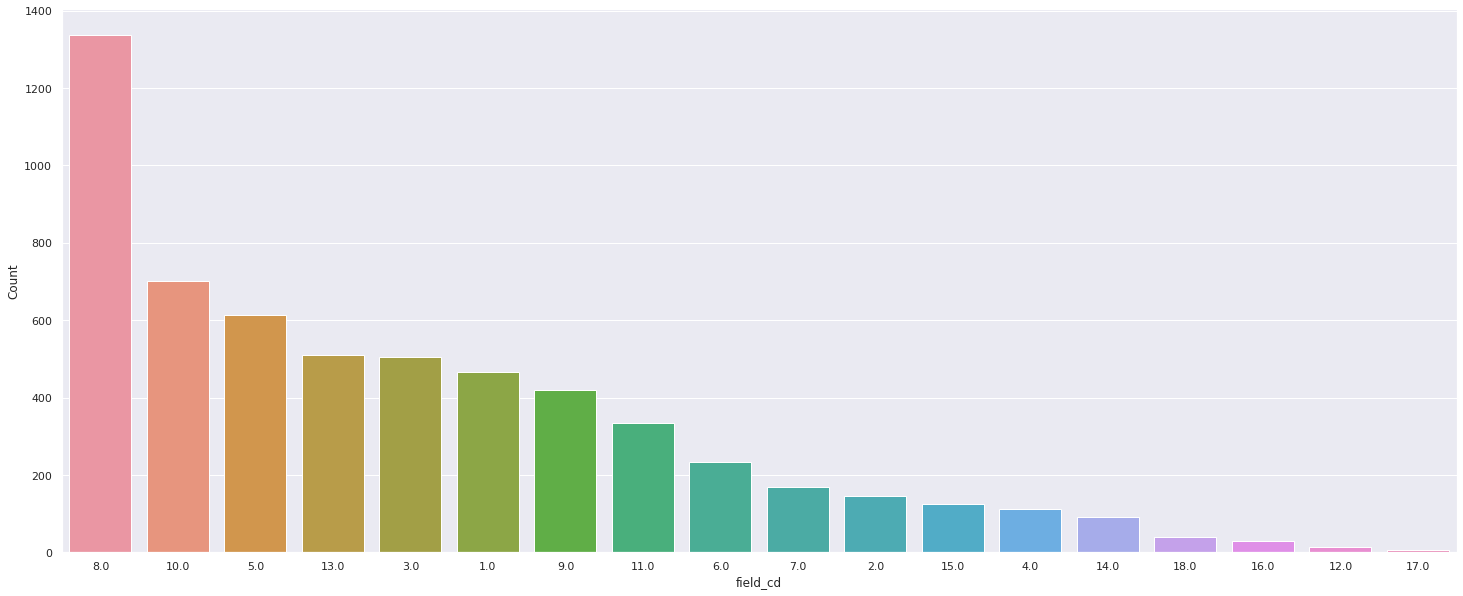

In [12]:
# checking for distribution of field_cd column before handling
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot('field_cd', data = df_1, order = df_1['field_cd'].value_counts().index, ax = ax)
ax.set(xlabel='field_cd', ylabel='Count')
plt.show()

In [13]:
#check how many nan value in field_cd column to handle that
df_1['field_cd'].isnull().sum()

59

field_cd column has **59** nan values so we need to avoid this null values so the best solution to fill this nan values with **18** wich mean **other** in the this column so i will fill the nan values with **18**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


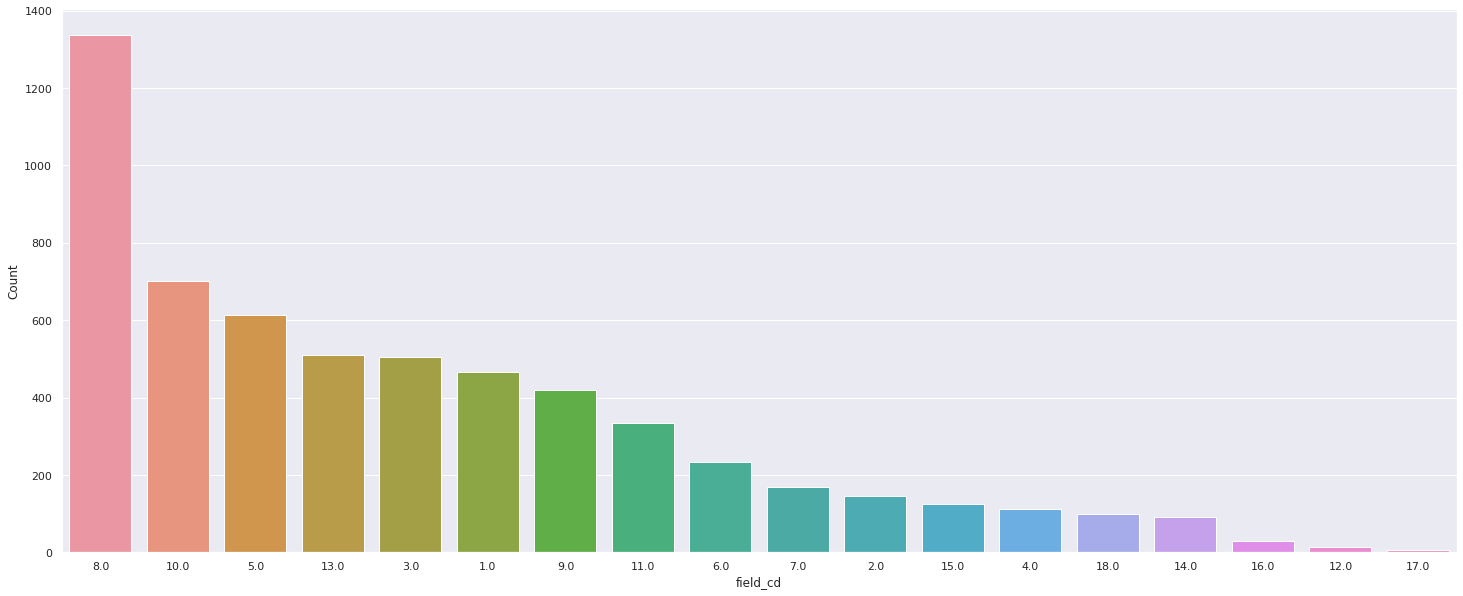

In [14]:
#fill the nan values with 18
df_1['field_cd'].fillna(18, inplace = True)

# checking for distribution of field_cd column after handling
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot('field_cd', data = df_1, order = df_1['field_cd'].value_counts().index, ax = ax)
ax.set(xlabel='field_cd', ylabel='Count')
plt.show()



---
---



#**career column**

from the data description i found that the (career) column and (career_c) column represent the same information, career mean your career and career_c is career coded this look like i made label encoder for career column to produce career_c column so i will drop career column and use career_c 

In [15]:
print(df_1['career'].unique())
print('==============================================================================')
print(df_1['career_c'].unique())

['University President', 'Engineer or iBanker or consultant', 'Real Estate Consulting', 'public service', 'undecided', ..., 'WRITING', 'Academia, Research, Banking, Life', 'Entrepreneurship', 'engineering professional', 'Fundraising for Non-Profits']
Length: 368
Categories (367, object): ['?', '??', 'ASIC Engineer', 'Academia', ..., 'writer',
                           'writer/editor', 'writer/producer', 'writer/teacher']
[ 2.  7.  9. 10.  5.  4.  1.  3. 15.  6. 11. 16. 17.  8. nan 13. 12. 14.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


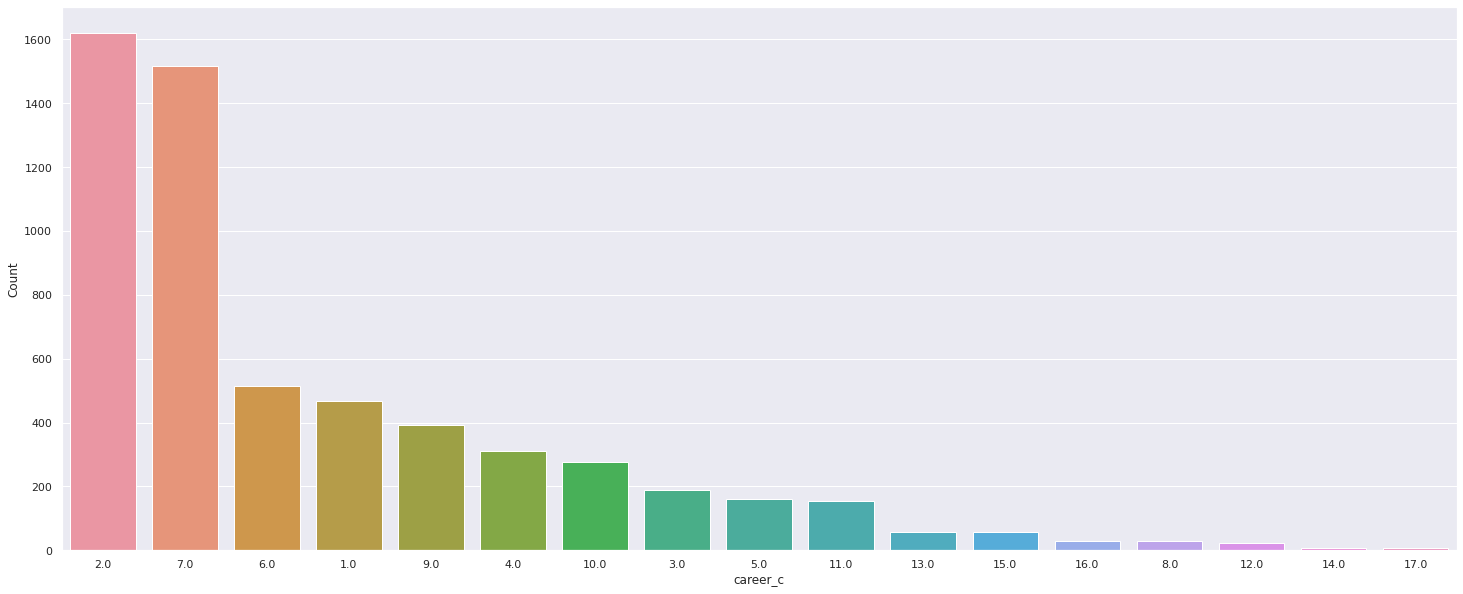

In [16]:
# checking for distribution of career_c column before handling
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot('career_c', data = df_1, order = df_1['career_c'].value_counts().index, ax = ax)
ax.set(xlabel='career_c', ylabel='Count')
plt.show()

In [17]:
#check how many nan value in career_c column to handle that
df_1['career_c'].isnull().sum()

100

career_c column has **100** nan values so we need to avoid this null values so the best solution to fill this nan values with **15** wich mean **other** in the this column so i will fill the nan values with **15**

career_c column has nan values so i will fill the nan values with 15 which mean 'other'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


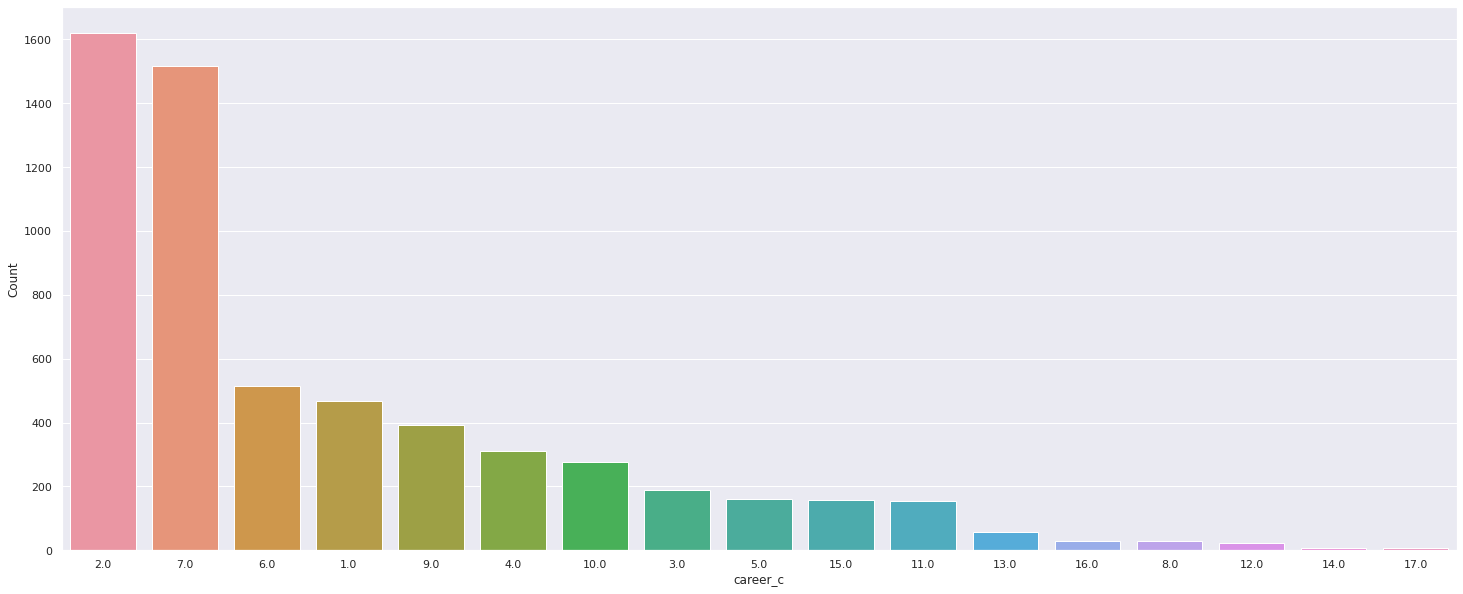

In [18]:
#fill the nan values with 18
df_1['career_c'].fillna(15, inplace = True)

# checking for distribution of career_c column after handling
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot('career_c', data = df_1, order = df_1['career_c'].value_counts().index, ax = ax)
ax.set(xlabel='career_c', ylabel='Count')
plt.show()



---
---



#**mn_sat column**

In [19]:
df_1['mn_sat'].unique()

['1,290.00', NaN, '1,400.00', '1,330.00', '1,210.00', ..., '1,149.00', '1,370.00', '1,134.00', '1,215.00', '1,080.00']
Length: 69
Categories (68, object): ['1,011.00', '1,014.00', '1,030.00', '1,034.00', ..., '1,470.00', '1,490.00',
                          '914', '990']

In [20]:
#check how many nan value in mn_sat column to handle that
df_1['mn_sat'].isnull().sum()

3674

* as we see we have a huge number of null value which is bad but i will try to use this column in the first trail and see the results then i will see what should i do with this column.

* So i will use this column but i will convert this column from categorical to float by using this below function which remove any  comma ( *,* )

* so why i don't use one hot encoding because i have 69 unique value and this values is numbers so i don't use the one hot encoding

* and i will fill this null values by using **pipeline**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


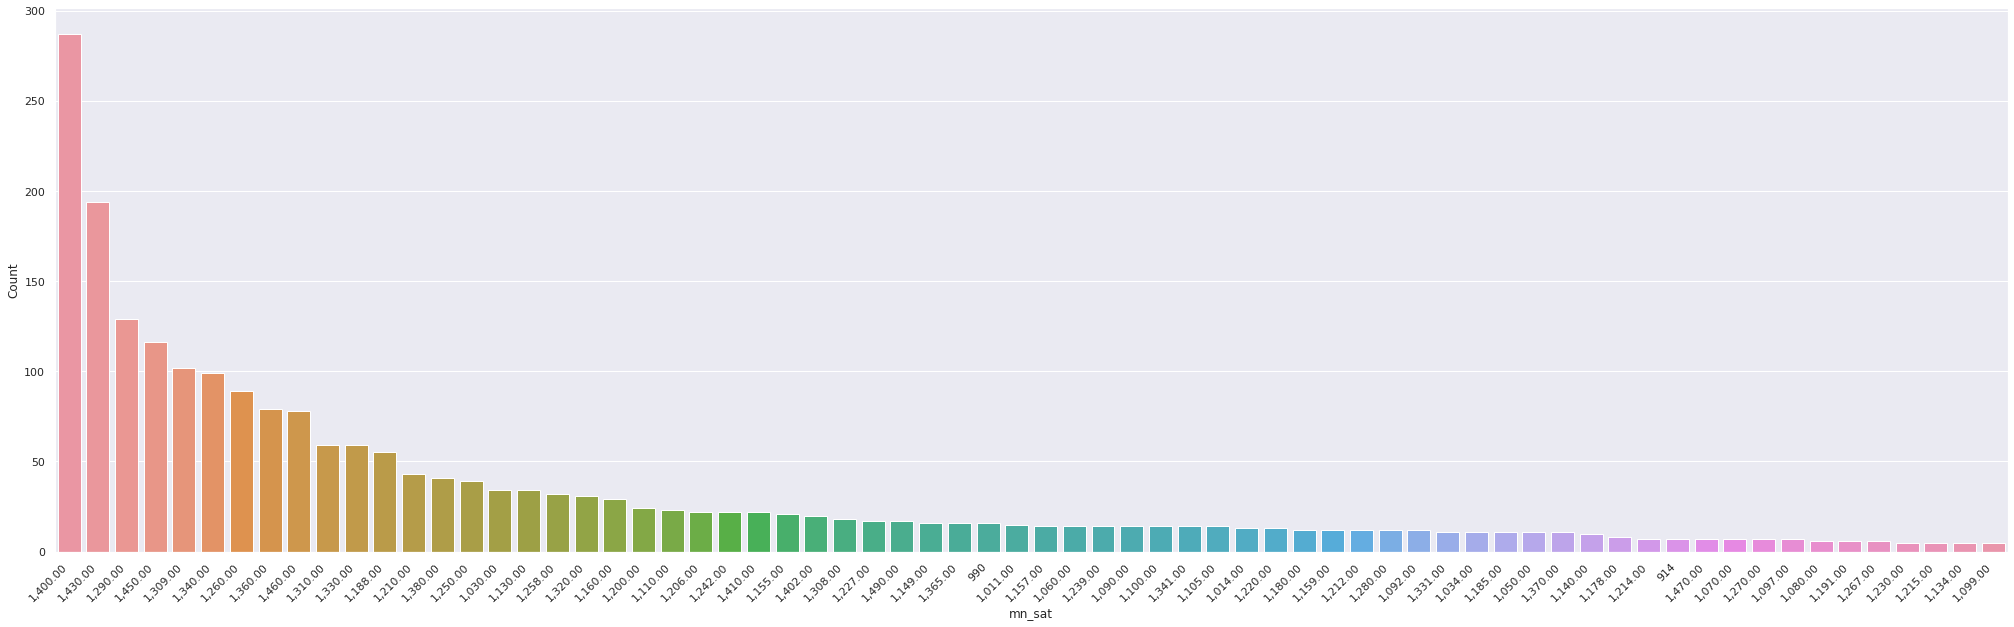

In [21]:
# checking for distribution of mn_sat column before handling
fig, ax = plt.subplots(figsize = (35, 10))
sns.countplot('mn_sat', data = df_1, order = df_1['mn_sat'].value_counts().index, ax = ax)
ax.set(xlabel='mn_sat', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

i will convert this column to float column which i will convert the object values to float numbers by using the seperator ','

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


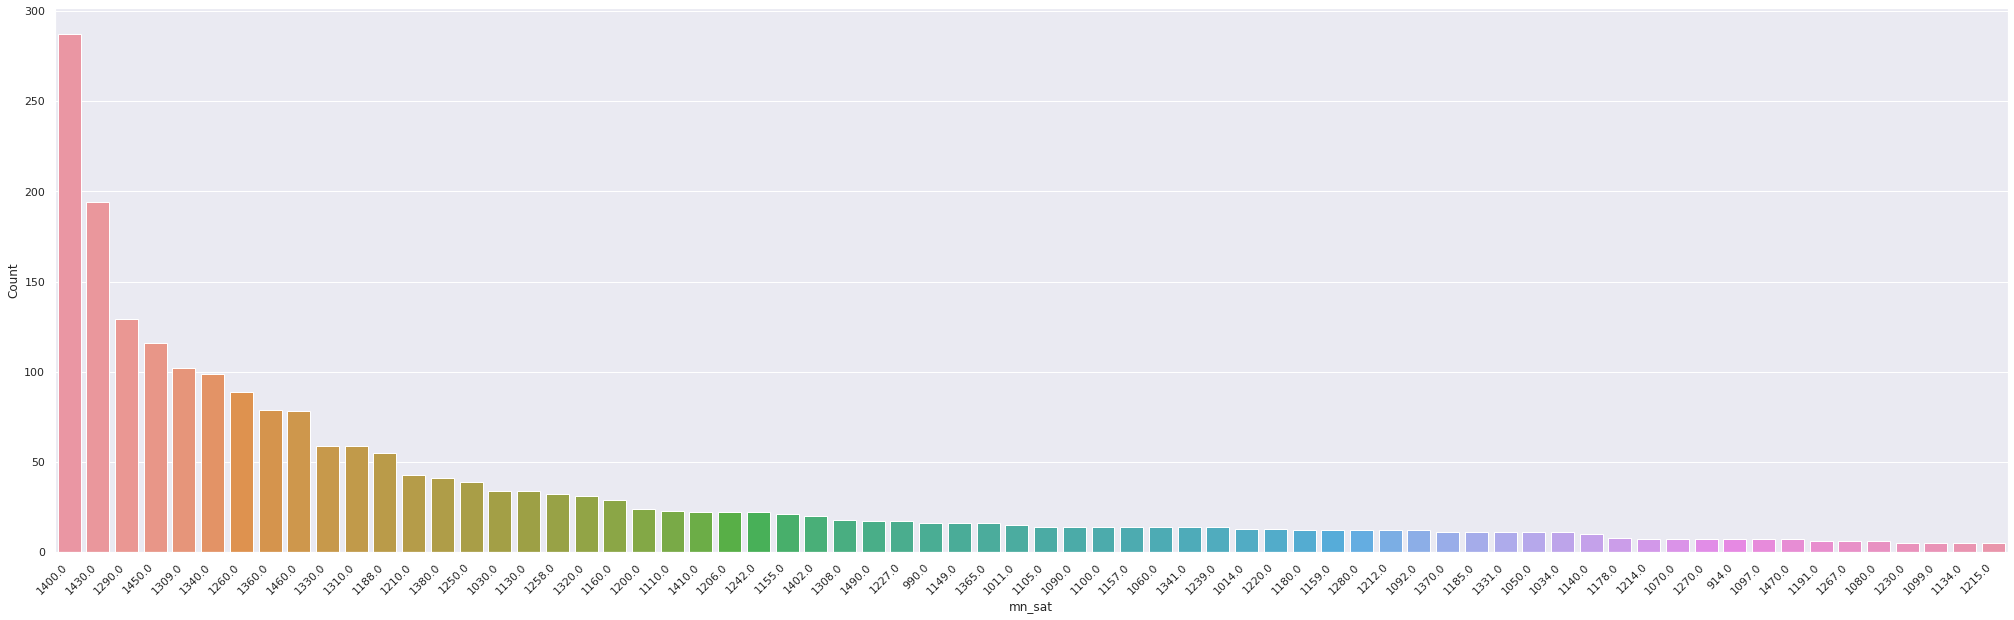

In [22]:
#convert categorical data to float data
df_1['mn_sat'] = df_1['mn_sat'].str.replace(',','').astype(float)


# checking for distribution of mn_sat column after handling
fig, ax = plt.subplots(figsize = (35, 10))
sns.countplot('mn_sat', data = df_1, order = df_1['mn_sat'].value_counts().index, ax = ax)
ax.set(xlabel='mn_sat', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

as we see all values become float number but big numbers so i will normalize them by using pipeline

#**tuition column**

in this column i will do like i did in column **mn_sat** because they looks like each other in the values but they doesn't represent the same information 

In [23]:
df_1['tuition'].unique()

['21,645.00', NaN, '26,019.00', '34,290.00', '12,900.00', ..., '24,921.00', '26,775.00', '23,530.00', '17,478.00', '14,600.00']
Length: 116
Categories (115, object): ['10,052.00', '10,096.00', '10,222.00', '10,332.00', ..., '9,696.00',
                           '9,729.00', '9,790.00', '9,811.00']

In [24]:
#check how many nan value in tuition column to handle that
df_1['tuition'].isnull().sum()

3365

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


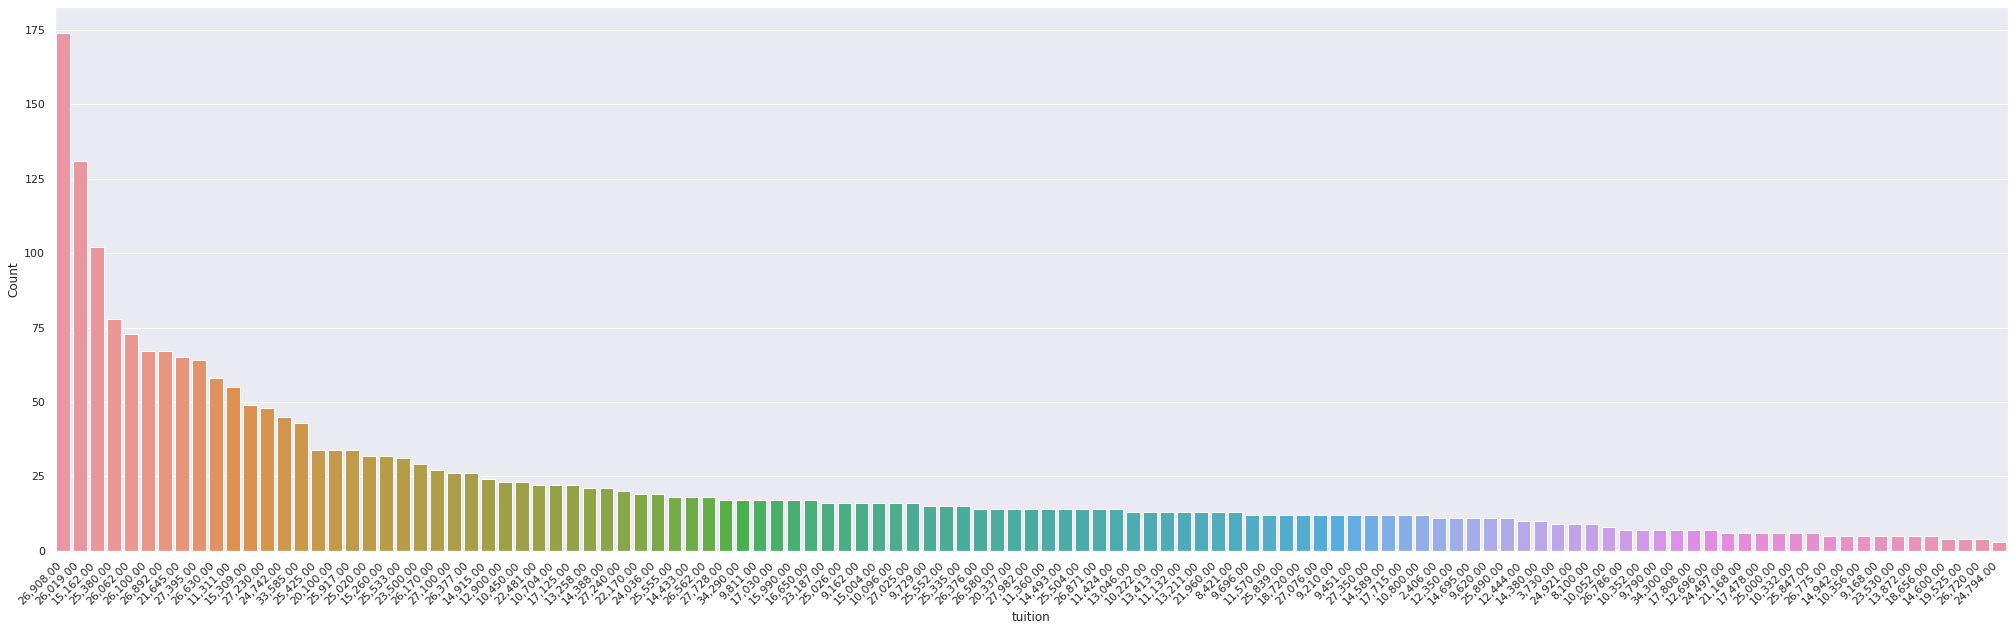

In [25]:
# checking for distribution of tuition column before handling
fig, ax = plt.subplots(figsize = (35, 10))
sns.countplot('tuition', data = df_1, order = df_1['tuition'].value_counts().index, ax = ax)
ax.set(xlabel='tuition', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

i will convert this column to float column which i will convert the object values to float numbers by using the seperator ','

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


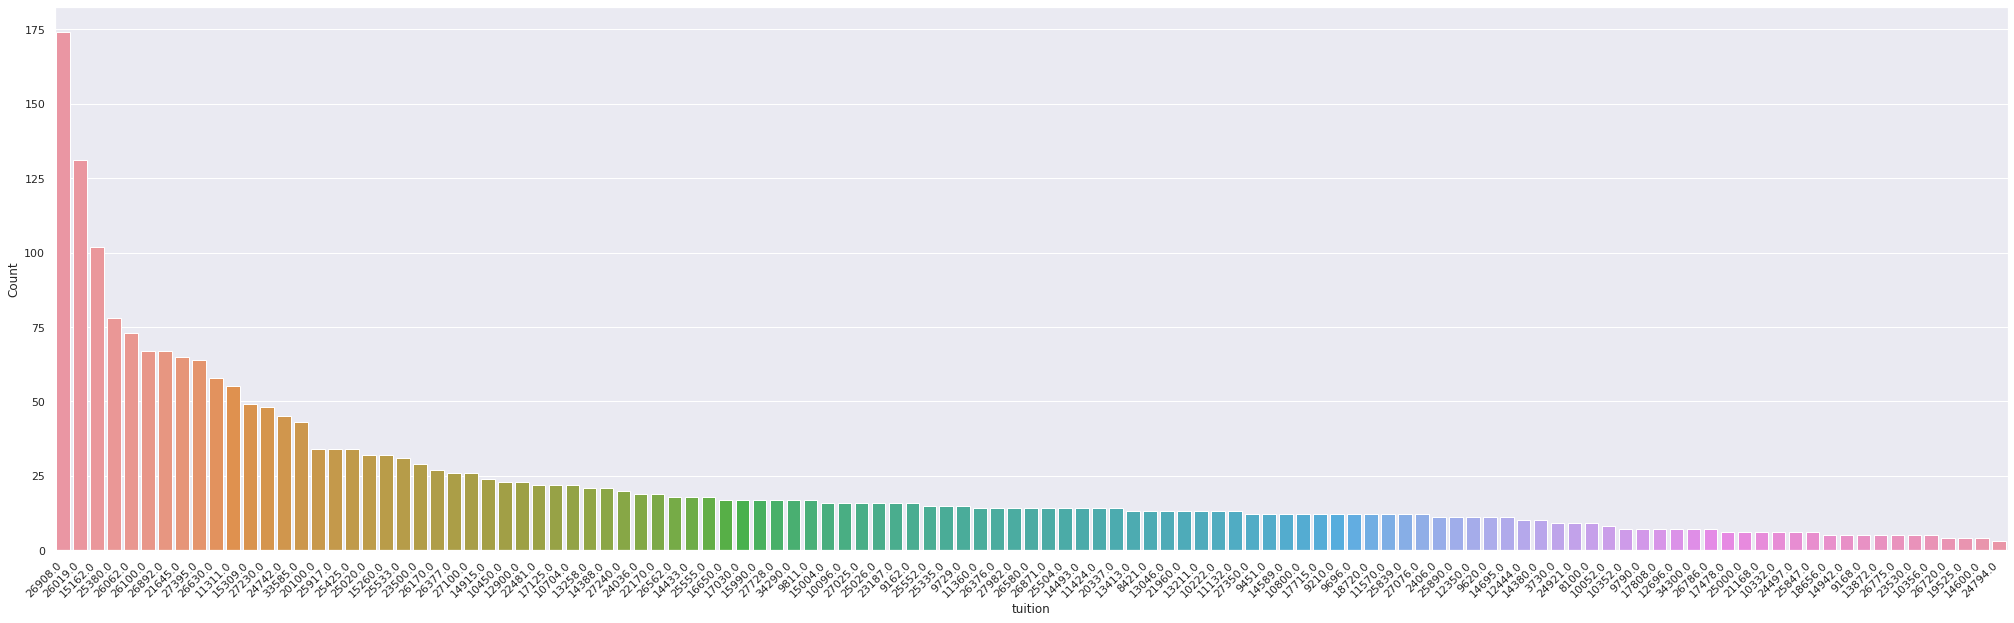

In [26]:
#convert categorical data to float data
df_1['tuition'] = df_1['tuition'].str.replace(',','').astype(float)


# checking for distribution of mn_sat column after handling
fig, ax = plt.subplots(figsize = (35, 10))
sns.countplot('tuition', data = df_1, order = df_1['tuition'].value_counts().index, ax = ax)
ax.set(xlabel='tuition', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

as we see all values become float number but big numbers so i will normalize them by using pipeline



---



---



#**from column**

this column and zipcode column represent the same information which **from** column represent *Where are you from originally * and zipcode represent *What was the zip code of the area where you grew up?* so in the first trial i will drop zipcode column and use from column instead of zipcode column

In [27]:
print(df_1['from'].unique())
print(df_1['from'].isnull().sum())

['Palo Alto, CA', 'Boston, MA', 'Bombay, India', 'Washington, DC', 'Midwest USA', ..., 'MD', 'alabama', 'Pittsburgh, PA', 'Bogota, Colombia', 'Westchester, new York']
Length: 270
Categories (269, object): ['94115', 'Alabama', 'Albania', 'Albuquerque, NM', ..., 'taiwan',
                           'uruguay', 'way too little space here. world citizen.',
                           'working']
58


In [28]:
print(df_1['zipcode'].unique())
print(df_1['zipcode'].isnull().sum())

[NaN, '2,021', '10,471', '66,208', '10,021', ..., '36,701', '15,146', '11,020', '7,045', '33,021']
Length: 410
Categories (409, object): ['0', '1,040', '1,114', '1,128', ..., '96,797', '96,822', '98,115',
                           '98,579']
720


as we see also zipcode has 720 null values and 410 unique value which is big data to convert it by one hot encoding instead of this the **from** column has 270 unique value which good for one hot encoding and has only 58 nan value which is good i can handle this by using pipeline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


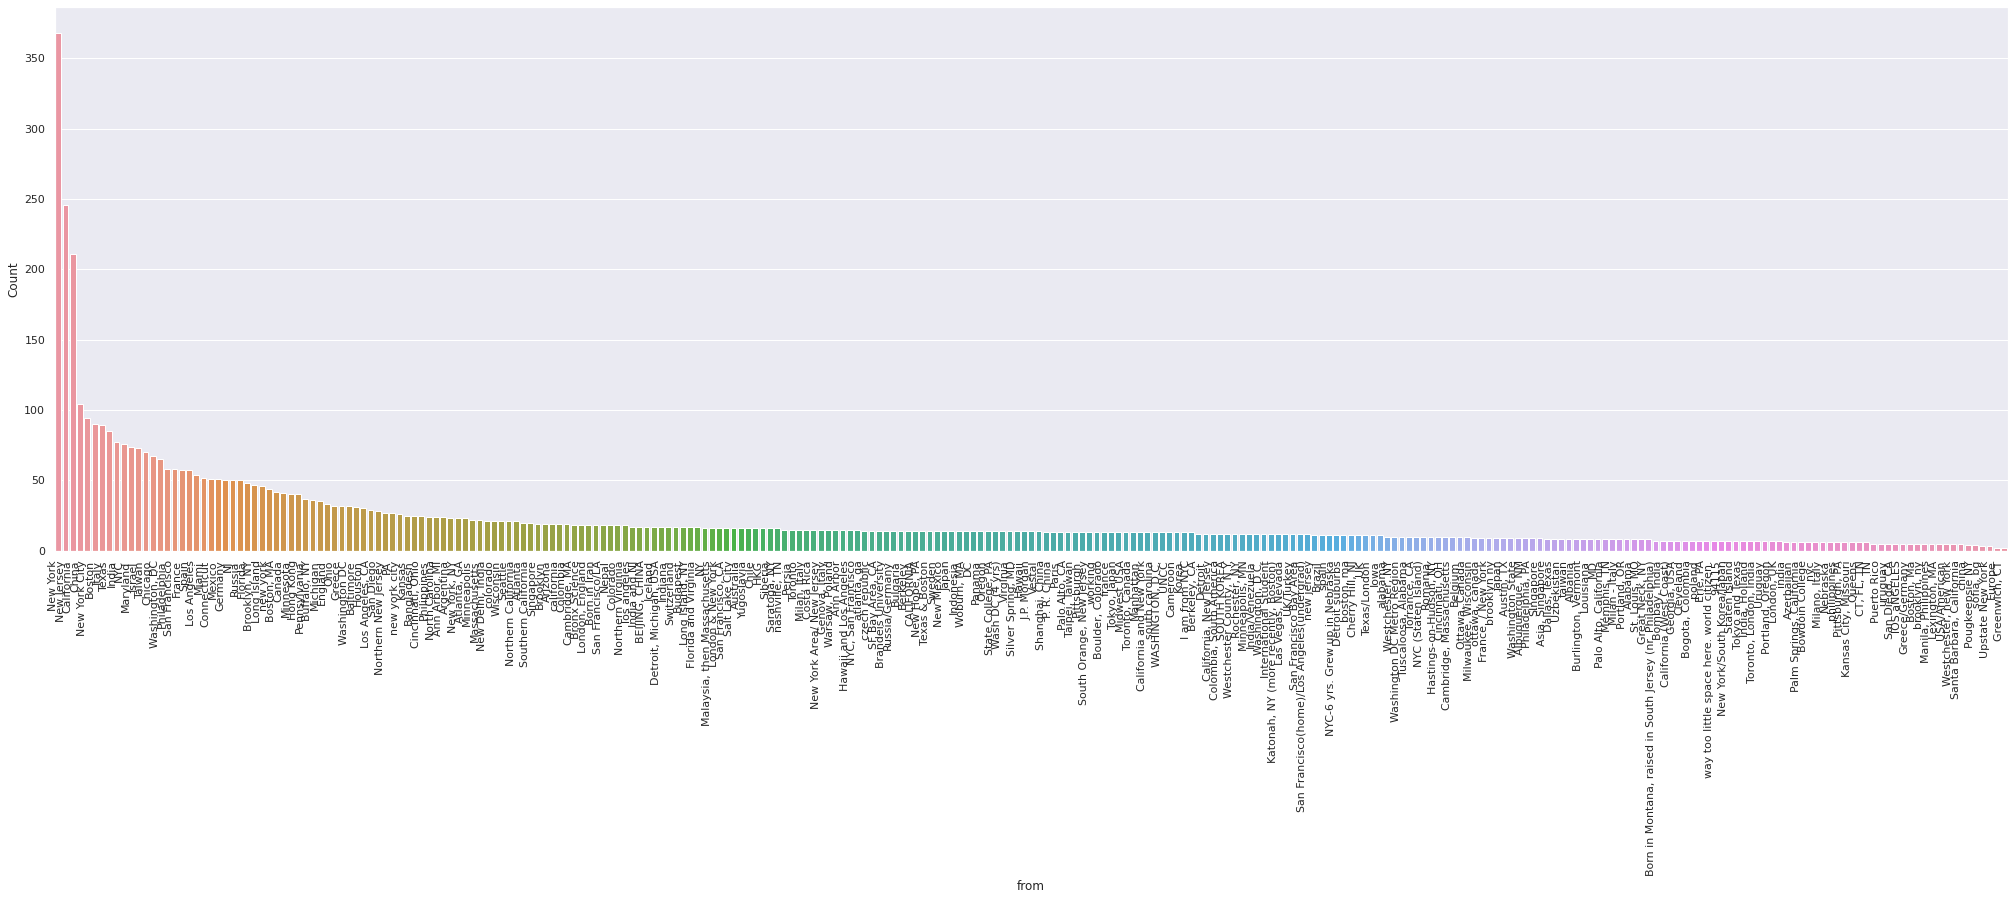

In [29]:
# checking for distribution of from column before handling
fig, ax = plt.subplots(figsize = (35, 10))
sns.countplot('from', data = df_1, order = df_1['from'].value_counts().index, ax = ax)
ax.set(xlabel='from', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

#**income Column**

in this column i will do like i did in column **mn_sat** because they looks like each other in the values but they doesn't represent the same information 

In [30]:
df_1['income'].unique()

[NaN, '45,300.00', '46,138.00', '55,080.00', '36,594.00', ..., '60,304.00', '22,161.00', '36,381.00', '78,193.00', '31,632.00']
Length: 262
Categories (261, object): ['106,663.00', '109,031.00', '12,063.00', '12,416.00', ..., '89,977.00',
                           '90,225.00', '97,857.00', '97,972.00']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


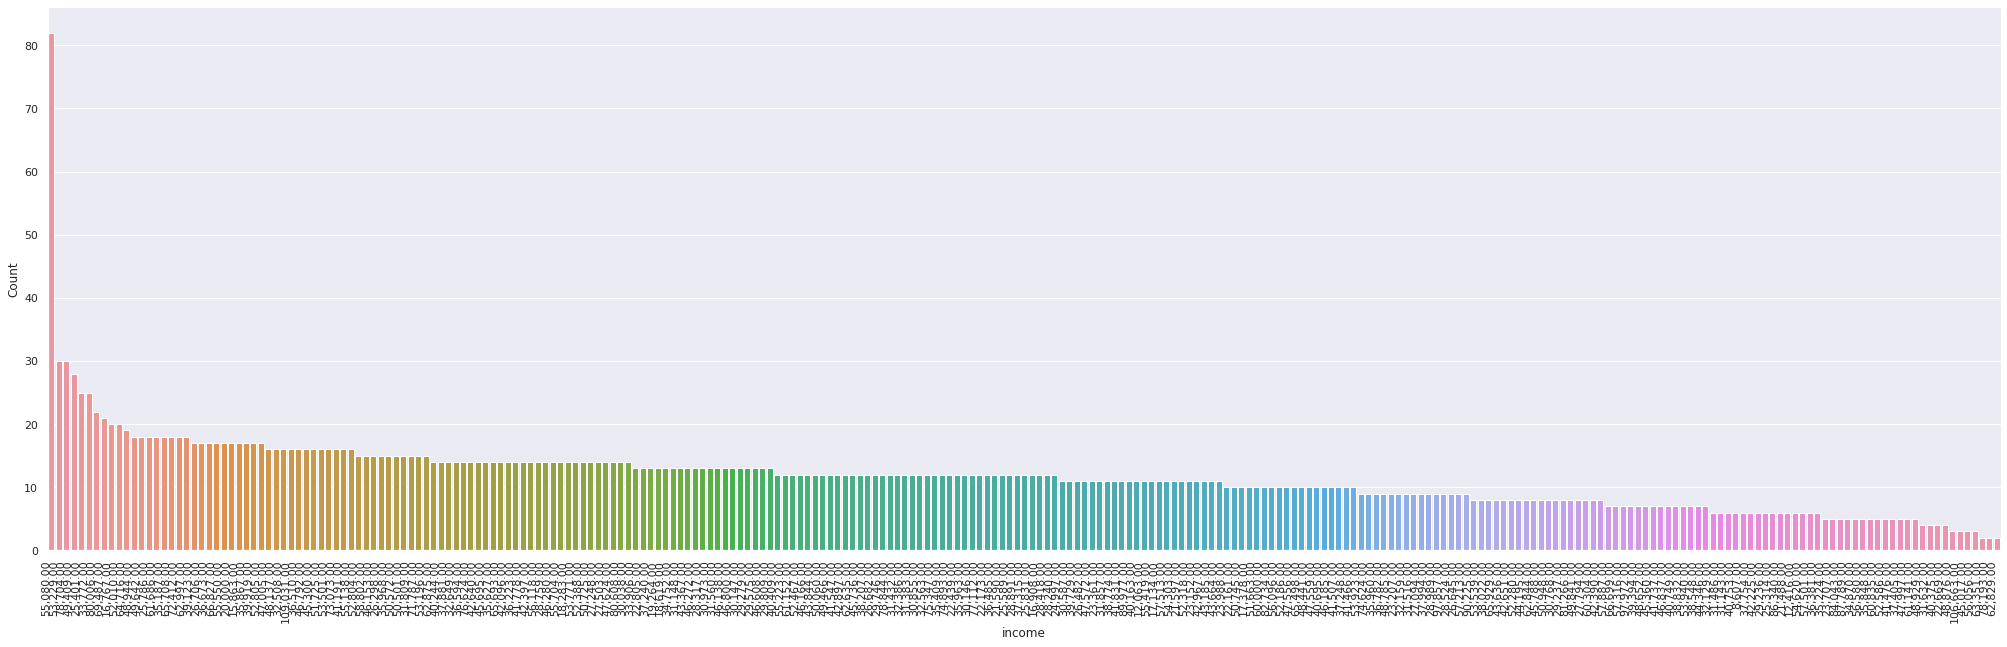

In [31]:
# checking for distribution of income column before handling
fig, ax = plt.subplots(figsize = (35, 10))
sns.countplot('income', data = df_1, order = df_1['income'].value_counts().index, ax = ax)
ax.set(xlabel='income', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

i will convert this column to float column which i will convert the object values to float numbers by using the seperator ','

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


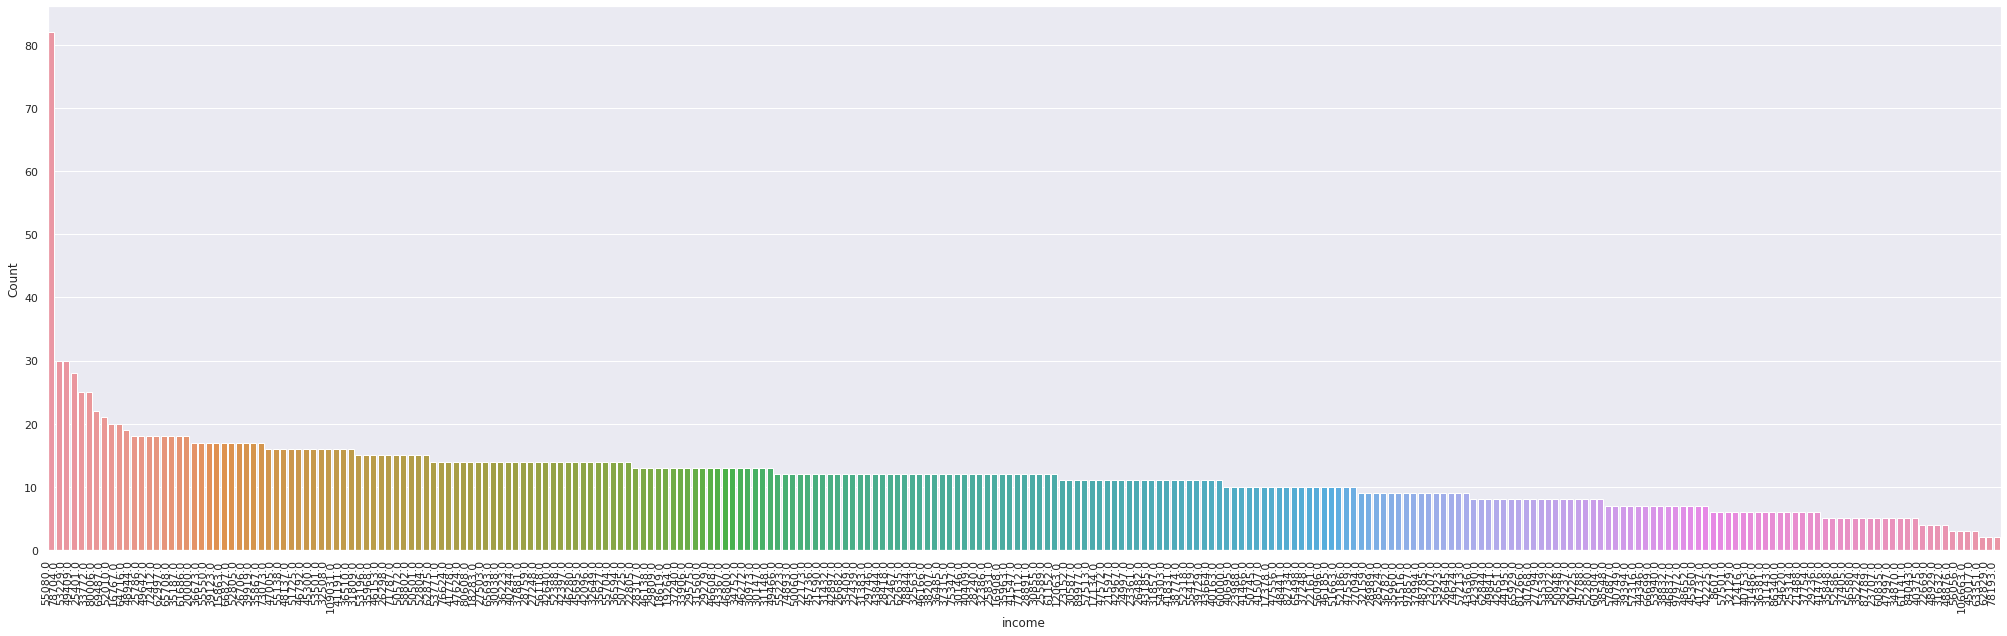

In [32]:
#convert categorical data to float data
df_1['income'] = df_1['income'].str.replace(',','').astype(float)


# checking for distribution of income column after handling
fig, ax = plt.subplots(figsize = (35, 10))
sns.countplot('income', data = df_1, order = df_1['income'].value_counts().index, ax = ax)
ax.set(xlabel='income', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

as we see it is the same distribution but it's not the same values the first one before handling is categorical but after handling it's float

####all categorical feature which i was handling them i will complete this handling by using **pipeline** like (normalization , oneHot encoding, fill nan values,...) 



---



---



---



---



#Drop features

* the first things i will drop are that things i was talking about them in the upper part like ('field', 'career', 'zipcode') and said the reasons 

* the second things i will drop are any thing related to id like (id, idg, partner, pid) which all of that are IDs so i will drop them

In [33]:
#drop some features
df_1.drop(['id', 'idg','partner', 'pid', 'field', 'career', 'zipcode'], axis=1, inplace = True)

In [34]:
#display some rows of data frame after what i did
df_1.head()

gender  condtn  wave  round  position  positin1  order  match  int_corr  \
0       0       2    14     18         2       2.0     14      0     -0.03   
1       1       1     3     10         2       NaN      8      0      0.21   
2       1       1    13     10         8       8.0     10      0      0.43   
3       1       2     9     20        18      13.0      6      0      0.72   
4       1       2    14     20         6       6.0     20      0      0.33   

   samerace  ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  \
0         0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
1         0  ...      6.0      8.0       8.0     7.0     8.0      NaN   
2         0  ...      NaN      NaN       NaN     NaN     NaN      NaN   
3         1  ...      8.0      9.0       8.0     8.0     6.0      NaN   
4         0  ...      NaN      NaN       NaN     NaN     NaN      NaN   

   sinc5_3  intel5_3  fun5_3  amb5_3  
0      NaN       NaN     NaN     NaN  
1      NaN       NaN     NaN     NaN  
2      NaN       NaN     NaN     NaN  
3      NaN       NaN     NaN     NaN  
4      NaN       NaN     NaN     NaN  

[5 rows x 185 columns]

In [35]:
df_1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 185 entries, gender to amb5_3
dtypes: category(2), float64(175), int64(8)
memory usage: 8.3 MB


In [36]:
#display the categorical columns after what i did
df_1[df_1.select_dtypes(['category']).columns]

undergra            from
0                     University of Michigan-Ann Arbor   Palo Alto, CA
1                                                  NaN      Boston, MA
2     Rizvi College of Architecture, Bombay University   Bombay, India
3                                                  NaN  Washington, DC
4                                      Harvard College     Midwest USA
...                                                ...             ...
5904                                               NaN        New York
5905                                               NaN        Colombia
5906                          University of Washington         Seattle
5907                                               NaN          Canada
5908                                  Hamilton College   Cambridge, MA

[5909 rows x 2 columns]

#Handling Test Data

here i will do what i did in the training data to make it easy for the model to predicte the result of this data

In [37]:
#load the data from my google drive into data frame
df_test = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/test.csv')
#take copy from this data frame to work on it 
dft_1 = df_test.iloc[:, :]
dft_1[dft_1.select_dtypes(['object']).columns] = dft_1.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [38]:
#fill the nan values with 18 as i did with training data
dft_1['field_cd'].fillna(18, inplace = True)

In [39]:
#fill the nan values with 15 as i did with training data
dft_1['career_c'].fillna(15, inplace = True)

In [40]:
#convert categorical data to float data as i did with training data
dft_1['mn_sat'] = dft_1['mn_sat'].str.replace(',','').astype(float)


In [41]:
#convert categorical data to float data as i did with training data
dft_1['tuition'] = dft_1['tuition'].str.replace(',','').astype(float)


In [42]:
#convert categorical data to float data as i did with training data
dft_1['income'] = dft_1['income'].str.replace(',','').astype(float)


In [43]:
dft_1.drop(['id', 'idg','partner', 'pid', 'field', 'career', 'zipcode'], axis=1, inplace = True)

#split the data to features and target

**target data**

target data it will be fixed for all data preprocessing because i want to learn from this results not change this results

In [44]:
#target data it will be fixed for all data preprocessing not changeing
Y = df['match']
print(Y.shape)

(5909,)


**Features Data**

this data will change depend on the data preprocessing i did or i will do

In [45]:
#take a copy from df_1 data frame into X
X = df_1.iloc[:, :]
#then i drop the target column from X to make X has all features only to train
X = X.drop(['match'], axis=1)
#print the shape for features
print(X.shape)

(5909, 184)


Split the training data into training set and test set to test results local 

In [46]:
#split the training set inot 90% training and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (5318, 184)
X_test: (591, 184)
y_train: (5318,)
y_test: (591,)


create 2 list to pass these two list to pipeline function to handle the data 
* list for numeric feature(float, int)
* list for categorical features

In [47]:
# numeric features can be selected by: (based on the df_1.info() output )
features_numeric = list(X.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df_1.info() output )
features_categorical = list(X.select_dtypes(include=['category']))

print('numeric features:', len(features_numeric))
print('categorical features:', len(features_categorical))

numeric features: 182
categorical features: 2


#Pipeline

here i will prepare the transformer and processor for handling the data and pass this processor to Pipeline to complete handling of the data like fill the null values and normalize the data that for numeric data and fill null values and using one hot encoding for categorical data

In [48]:
np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters

# step 1:handling numeric features

# step 1.1: imputer -> impute missing values with the (mean, median, mode) of the feature that the (gride search, random search, bayesian search) will decide this
# step 1.2: scaler -> converting the feature to unit variace( normalize the data values)

transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters

# step 2:handling categorical features

# step 2.1: imputer -> fill any missing value with constant
# step 2.2: onehot -> to encode categorical features

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 

# step 3:transforme the features

# step 3.1: num -> numeric transformer for numeric features
# step 3.2: cat -> categorical transformer for categorical features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

#Pipeline Models

##first Trail (gridesearch, randomeforest_model)

from all of this data preprocessing i will use gride search for hyperparameters tuning and use Randomforest model for first training.
so i will pass the preprocessor and the RandomForest model to pipeline 

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
grid_randomforest_pip = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('random_forest', RandomForestClassifier(random_state = 3),
        )
    ])
grid_randomforest_pip

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', '

In [ ]:
#train the model on the training data with default hyperparameters
grid_randomforest_pip = grid_randomforest_pip.fit(X_train, y_train)
print('RandomForest_model Train Score is : ' ,grid_randomforest_pip.score(X_train, y_train))

RandomForest_model Train Score is :  1.0


before i use gride search i expect to get roc_auc result around 84% because i didn't make a powerful data preprocessing and there are a lot of columns has huge missing values and this null values will fill by mean or median which it's not good enough 

i will use set of hyperparameter as we see in the next cell like (n_estimators, max_depth) and let grid_search tune alot of hyperparameters

In [ ]:
# using a wider range of parameters
randomForest_params = {
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'preprocessor__num__imputer__strategy': ['mean','median'],
    # wider range for number of estimators in the ensemble
    'random_forest__n_estimators': [100,150,200,250],
    # maximum tree depth
    'random_forest__max_depth':[10,20,30,50],
}
  # cv=2 means ==> 2-fold cross-validation
  # Scoring roc_auc mean ==> foun the best hyperparameters with high roc_auc
grid_search_randomForest_trail_1 = GridSearchCV(grid_randomforest_pip, randomForest_params, cv=2, verbose=1, n_jobs=2, scoring='roc_auc')

grid_search_randomForest_trail_1.fit(X_train, y_train)

#print the best score with best hyperparameters
print('best score {}'.format(grid_search_randomForest_trail_1.best_score_))
print('best score {}'.format(grid_search_randomForest_trail_1.best_params_))

Fitting 2 folds for each of 32 candidates, totalling 64 fits
best score 0.8432767982429382
best score {'preprocessor__num__imputer__strategy': 'mean', 'random_forest__max_depth': 10, 'random_forest__n_estimators': 200}


as i expected the best score is around 84% so it's not bad but i will try to get better Score

**virtualization for Roc_curve by using the model with the test**

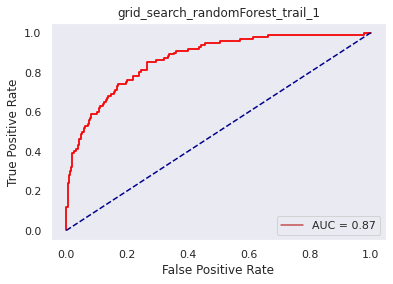

In [ ]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(y_test, grid_search_randomForest_trail_1.predict_proba(X_test)[:,1])

roc_auc = roc_auc_score(y_test, grid_search_randomForest_trail_1.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('grid_search_randomForest_trail_1')
plt.legend(loc = 'lower right')
plt.grid()

on kaggle i get around 84% 

it's not bad and not good it's so-so, and i will try another model with another Search to see if there any improve or not


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/test.csv')
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = grid_search_randomForest_trail_1.predict_proba(dft_1)[:,1]

submission.to_csv('G_RF_trail_1.csv', index=False)

##Trail_2 (randomSearch, xgb model)

* now i will train on xgb model on the same data but using randomSearch for hyperparameter tuning to see if there is any improve or not 

* but i expecte to have any improve i expect to get around 86% for roc_auc or more because the xgb model is better than randomForest in this case

In [ ]:
xgb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('xgb_random', XGBClassifier(objective='binary:logistic', seed=0)
        )
    ]
)
xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', '

In [ ]:
xgb_random_params = {
 'preprocessor__num__imputer__strategy': ['mean','median'],
  # wider range for number of estimators in the ensemble
 'xgb_random__n_estimators': [100,200,500],
  #  maximum depth [5,7,10,15] 
 'xgb_random__max_depth':[5,7,10,15],
 'xgb_random__subsample':[0.6,0.8,1],
 'xgb_random__colsample_bytree':[0.5,0.7,1],
 }

# cv=2 means five-fold cross-validation
# n_jobs means the cucurrent number of jobs
#n_iter ==> # number of random trials
xgb_randomS_trail_2 = RandomizedSearchCV(xgb, xgb_random_params, cv=2, n_iter=50, verbose=3, n_jobs=2, scoring='roc_auc')
xgb_randomS_trail_2.fit(X_train, y_train)

# to show the best score and hyperparameters

print('best score {}'.format(xgb_randomS_trail_2.best_score_))
print('best score {}'.format(xgb_randomS_trail_2.best_params_))
  

Fitting 2 folds for each of 50 candidates, totalling 100 fits
best score 0.8614036158054217
best score {'xgb_random__subsample': 0.6, 'xgb_random__n_estimators': 100, 'xgb_random__max_depth': 5, 'xgb_random__colsample_bytree': 0.7, 'preprocessor__num__imputer__strategy': 'median'}


it's look like what i expected this trial give me score 86.1% which is better then the previous model but i'm still want to try another model to see if i can improve my results or not

**virtualization for Roc_curve by using the model with the test**

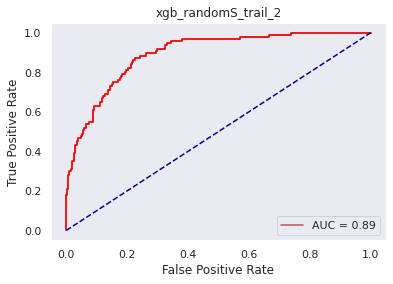

In [ ]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(y_test, xgb_randomS_trail_2.predict_proba(X_test)[:,1])

roc_auc = roc_auc_score(y_test, xgb_randomS_trail_2.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('xgb_randomS_trail_2')
plt.legend(loc = 'lower right')
plt.grid()

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/test.csv')
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = xgb_randomS_trail_2.predict_proba(dft_1)[:,1]

submission.to_csv('xgb_FT.csv', index=False)

on kaggle i got around 85.5%

this trial is much better than the first one ,and i will try another model with another Search to see if there any improve or not

##Trail_3 (BayesianSearch, Decision Tree model)

* now i will train on Decision tree model on the same data but using BayesianSearch for hyperparameter tuning to see if there is any improve or not 

* but i expect to haven't any improve i expect to get Score around 83% for roc_auc or less because i used the powerful models like RandomForest and XGB model and didn't get Score more than 86%

In [68]:
DT_pip = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('DT_Bayes', DecisionTreeClassifier(random_state=3)
        )
    ]
)
DT_pip

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', '

In [70]:
DT_Bayes_params = {
 'preprocessor__num__imputer__strategy': ['mean','median'],
 'DT_Bayes__criterion' : ["gini" , "entropy"],
 'DT_Bayes__max_depth' : [4, 5, 7, 10, 15, 20],
 'DT_Bayes__min_samples_leaf' : [1, 2, 3, 4, 7, 10, 15, 20],
 }

# cv=2 means five-fold cross-validation
# n_jobs means the cucurrent number of jobs
#n_iter ==> # number of random trials
DT_Bayes_trail_3 = BayesSearchCV(DT_pip, DT_Bayes_params, cv=2, n_iter=15, verbose=1, n_jobs=2, scoring='roc_auc')
DT_Bayes_trail_3.fit(X_train, y_train)

# to show the best score and hyperparameters

print('best score {}'.format(DT_Bayes_trail_3.best_score_))
print('best score {}'.format(DT_Bayes_trail_3.best_params_))
  

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
best score 0.799474305004779
best score OrderedDict([('DT_Bayes__criterion', 'entropy'), ('DT_Bayes__max_depth', 4)

as we see the decision tree is the worst one because the model give me around 80% score which is the worst one so i will try Logistic regression to see if the Score Will improve or not

**virtualization for Roc_curve by using the model with the test**

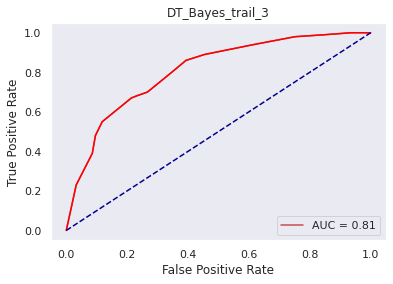

In [71]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(y_test, DT_Bayes_trail_3.predict_proba(X_test)[:,1])

roc_auc = roc_auc_score(y_test, DT_Bayes_trail_3.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT_Bayes_trail_3')
plt.legend(loc = 'lower right')
plt.grid()

In [72]:
df2 = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/test.csv')
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = DT_Bayes_trail_3.predict_proba(dft_1)[:,1]

submission.to_csv('xgb_FT.csv', index=False)

on kaggle i got around 83%

this trial is worst one between the first three trials



---



---



So from all trials i did until now the Trial_2 which use XGB model with RandomSearch is the best one which give me 86% score

so now i will change the data preprocessing to see if there is any improve or not 

##Trail_4 (RandomSearch, LogisticRegression model)

* now i will train on LogisticRegression model on the same data but using RandomSearch for hyperparameter tuning to see if there is any improve or not 

* but I expect to have any improve in the results after the bad trial i did by using Decision Tree so I expect to get around 85% for roc_auc or more 

In [50]:
LR_pip = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('LR_Random', LogisticRegression(random_state=3)
        )
    ]
)
LR_pip

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', '

In [73]:
LR_Random_params = {
 'preprocessor__num__imputer__strategy': ['mean','median'],
 'LR_Random__penalty' : ['l1', 'l2'],
 'LR_Random__C' : [0.001,0.01,1,5,10,25, 1e5],
 'LR_Random__solver' : ['liblinear']
 }

# cv=2 means five-fold cross-validation
# n_jobs means the cucurrent number of jobs
#n_iter ==> # number of random trials
LR_pip_trail_4 = RandomizedSearchCV(LR_pip, LR_Random_params, cv=2, n_iter=25, verbose=3, n_jobs=2, scoring='roc_auc')
LR_pip_trail_4.fit(X_train, y_train)

# to show the best score and hyperparameters

print('best score {}'.format(LR_pip_trail_4.best_score_))
print('best score {}'.format(LR_pip_trail_4.best_params_))
  

Fitting 2 folds for each of 25 candidates, totalling 50 fits
best score 0.8483842759237793
best score {'preprocessor__num__imputer__strategy': 'mean', 'LR_Random__solver': 'liblinear', 'LR_Random__penalty': 'l1', 'LR_Random__C': 0.01}


as we see the LR model give me Score 84.8% which is better than DT model but still not the best one so i expect to give me score 85% or more but the result was 84.3% which is so close to my expectation

**virtualization for Roc_curve by using the model with the test**

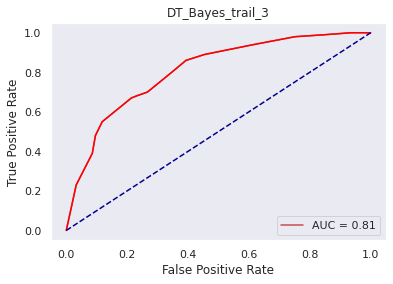

In [74]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(y_test, DT_Bayes_trail_3.predict_proba(X_test)[:,1])

roc_auc = roc_auc_score(y_test, DT_Bayes_trail_3.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT_Bayes_trail_3')
plt.legend(loc = 'lower right')
plt.grid()

In [75]:
df2 = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/test.csv')
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = LR_pip_trail_4.predict_proba(dft_1)[:,1]

submission.to_csv('xgb_FT.csv', index=False)

on kaggle i got around 83%

this trial is worst one between the first three trials



---



---



So from all trials i did until now the Trial_2 which use XGB model with RandomSearch is the best one which give me 86% score

so now i will change the data preprocessing to see if there is any improve or not 

#second Trial for Preprocessing

i will try to change my data preprocessing to get some thing much better than the previous

In [78]:
df_s = pd.read_csv("/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/train.csv")
df_s.head()

gender  idg  condtn  wave  round  position  positin1  order  partner  \
0       0    3       2    14     18         2       2.0     14       12   
1       1   14       1     3     10         2       NaN      8        8   
2       1   14       1    13     10         8       8.0     10       10   
3       1   38       2     9     20        18      13.0      6        7   
4       1   24       2    14     20         6       6.0     20       17   

     pid  ...  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0  372.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
1   63.0  ...      8.0       8.0     7.0     8.0      NaN      NaN       NaN   
2  331.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   
3  200.0  ...      9.0       8.0     8.0     6.0      NaN      NaN       NaN   
4  357.0  ...      NaN       NaN     NaN     NaN      NaN      NaN       NaN   

   fun5_3  amb5_3    id  
0     NaN     NaN  2583  
1     NaN     NaN  6830  
2     NaN     NaN  4840  
3     NaN     NaN  5508  
4     NaN     NaN  4828  

[5 rows x 192 columns]

in the begining i will do some things looks like the previous data preprocessing and i will try new things

#Look Like what i did in the first trial for data preprocessing

as i did before for the same reasons

In [79]:
print(df_s['field'].isnull().sum())
print('==============================================================================')
print(df_s['field_cd'].isnull().sum())

df_s['field_cd'].fillna(18, inplace = True)

45
59


In [80]:
print(df_s['career'].isnull().sum())
print('==============================================================================')
print(df_s['career_c'].isnull().sum())

#fill the nan values with 18
df_s['career_c'].fillna(15, inplace = True)

64
100


#the new data preprocessing 

In [81]:
print(df_s['age'].isnull().sum())
print('==============================================================================')
print(df_s['age_o'].isnull().sum())

63
65


In [82]:
print(df_s['age'].unique())
print('==============================================================================')
print(df_s['age_o'].unique())

[33. 22. 27. 31. 26. 28. 30. 23. 21. 24. 29. 25. 32. 20. 19. 36. 35. 55.
 nan 34. 38. 42. 39. 18. 37.]
[27. 24. 34. 25. 26. 28. 32. 36. 29. 23. 30. 21. 20. 22. 38. 31. 33. 35.
 42. 39. nan 19. 37. 18. 55.]


Text(0, 0.5, 'Frequency')

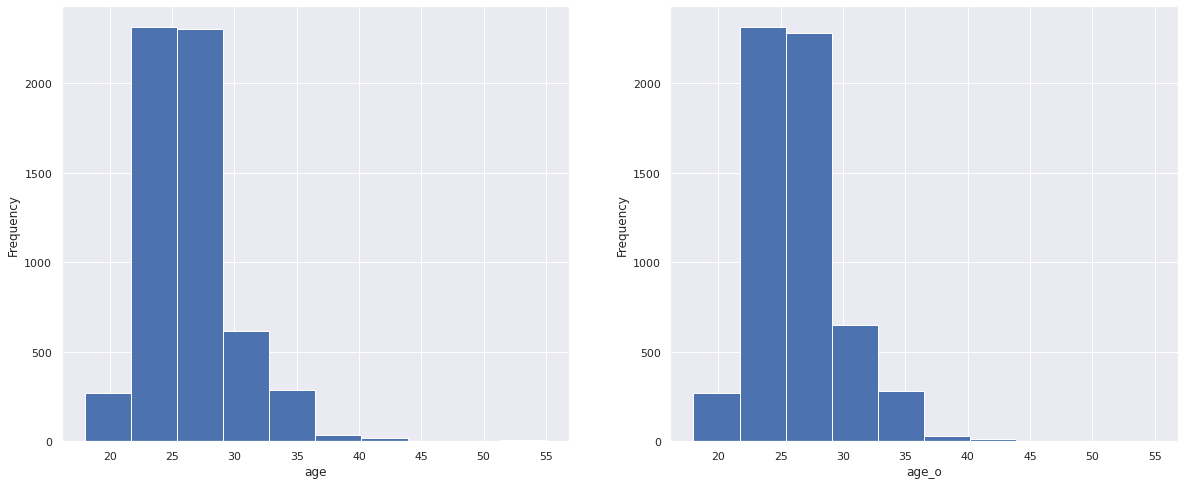

In [83]:
# age distribution of participants
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.hist(df_s[['age']].values);
plt.xlabel('age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_s[['age_o']].values);
plt.xlabel('age_o')
plt.ylabel('Frequency')


as we see this two column represent the same information and has the approximately distribution so i will drop one of them and keep the another one

here i will drop alot of things all of them i explained them before like IDs,  'age', (field, career, zipcode)

In [84]:
df_s.drop(['field','career','age','zipcode', 'id', 'idg', 'pid', 'partner'], axis = 1, inplace = True)

as we see ther are alot of columns has huge nan values so i decided to drop any column has 50% or more nan values from the data frame

In [85]:
#check for the columns which have the heights nun values
df.isnull().sum().sort_values(ascending=False)[:60]

num_in_3    5449
numdat_3    4849
expnum      4627
amb7_2      4519
sinc7_2     4519
shar7_2     4505
fun7_2      4498
intel7_2    4498
attr7_2     4498
amb7_3      4496
attr7_3     4496
sinc7_3     4496
intel7_3    4496
fun7_3      4496
amb5_3      4496
shar7_3     4496
fun5_3      4496
intel5_3    4496
sinc5_3     4496
attr5_3     4496
shar2_3     4496
attr4_3     3838
sinc2_3     3838
amb2_3      3838
fun2_3      3838
intel2_3    3838
attr2_3     3838
shar4_3     3838
amb4_3      3838
intel4_3    3838
fun4_3      3838
sinc4_3     3838
mn_sat      3674
tuition     3365
intel1_3    3105
attr1_3     3105
you_call    3105
them_cal    3105
date_3      3105
amb3_3      3105
sinc3_3     3105
sinc1_3     3105
fun1_3      3105
amb1_3      3105
fun3_3      3105
shar1_3     3105
intel3_3    3105
attr3_3     3105
intel3_s    3069
sinc3_s     3069
attr3_s     3069
amb3_s      3069
fun3_s      3069
attr1_s     2994
shar1_s     2994
amb1_s      2994
fun1_s      2994
intel1_s    2994
sinc1_s     29

###drop any column has more than 50% null Values

In [86]:
percent = 50.0 # Like N %
min_count =  int( ( (100 - percent) / 100 ) * df_s.shape[0] + 1)
df_s.dropna( axis=1, thresh = min_count, inplace = True)
df_s

gender  condtn  wave  round  position  positin1  order  match  int_corr  \
0          0       2    14     18         2       2.0     14      0     -0.03   
1          1       1     3     10         2       NaN      8      0      0.21   
2          1       1    13     10         8       8.0     10      0      0.43   
3          1       2     9     20        18      13.0      6      0      0.72   
4          1       2    14     20         6       6.0     20      0      0.33   
...      ...     ...   ...    ...       ...       ...    ...    ...       ...   
5904       0       2     9     20         2       2.0     18      0     -0.22   
5905       1       2     9     20        19      15.0      5      0      0.08   
5906       0       2    11     21         5       5.0      3      0      0.35   
5907       1       2     7     16         6      14.0      9      1      0.45   
5908       0       2    21     22         7       7.0      2      0      0.30   

      samerace  ...  attr3_2  sinc3_2  intel3_2  fun3_2  amb3_2  attr5_2  \
0            0  ...     10.0     10.0      10.0     9.0    10.0     10.0   
1            0  ...      6.0      7.0       7.0     7.0     8.0      NaN   
2            0  ...      7.0      9.0       9.0     8.0    10.0      7.0   
3            1  ...      8.0      9.0       8.0     8.0     7.0      NaN   
4            0  ...      7.0      8.0       9.0     9.0     8.0      7.0   
...        ...  ...      ...      ...       ...     ...     ...      ...   
5904         1  ...     10.0     10.0      10.0     8.0    10.0      NaN   
5905         0  ...      6.0      9.0       8.0     8.0     7.0      NaN   
5906         0  ...      7.0     10.0       9.0     8.0     4.0      6.0   
5907         0  ...      7.0      7.0       9.0     7.0     8.0      NaN   
5908         0  ...      7.0      7.0       7.0     9.0     6.0      7.0   

      sinc5_2  intel5_2  fun5_2  amb5_2  
0         9.0      10.0     9.0    10.0  
1         NaN       NaN     NaN     NaN  
2         9.0       8.0     7.0     9.0  
3         NaN       NaN     NaN     NaN  
4         7.0       8.0     8.0     8.0  
...       ...       ...     ...     ...  
5904      NaN       NaN     NaN     NaN  
5905      NaN       NaN     NaN     NaN  
5906     10.0       8.0     9.0     7.0  
5907      NaN       NaN     NaN     NaN  
5908      6.0       7.0     7.0     6.0  

[5909 rows x 125 columns]

####after the data preprocessing we have only 124 feature to train an 1 target column

so instead of 184 feature in the first trail we have 124 feature

#split the data to features and target

**target data**

target data it will be fixed for all data preprocessing because i want to learn from this results not change this results

In [87]:
#convert all object columns to categorical column
df_s[df_s.select_dtypes(['object']).columns] = df_s.select_dtypes(['object']).apply(lambda x: x.astype('category'))

#display the information of the dataframe for each feature
df_s.info(verbose=True,max_cols=34,memory_usage=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 125 columns):
 #    Column    Non-Null Count  Dtype   
---   ------    --------------  -----   
 0    gender    5909 non-null   int64   
 1    condtn    5909 non-null   int64   
 2    wave      5909 non-null   int64   
 3    round     5909 non-null   int64   
 4    position  5909 non-null   int64   
 5    positin1  4591 non-null   float64 
 6    order     5909 non-null   int64   
 7    match     5909 non-null   int64   
 8    int_corr  5800 non-null   float64 
 9    samerace  5909 non-null   int64   
 10   age_o     5844 non-null   float64 
 11   race_o    5861 non-null   float64 
 12   pf_o_att  5850 non-null   float64 
 13   pf_o_sin  5850 non-null   float64 
 14   pf_o_int  5850 non-null   float64 
 15   pf_o_fun  5843 non-null   float64 
 16   pf_o_amb  5836 non-null   float64 
 17   pf_o_sha  5826 non-null   float64 
 18   attr_o    5756 non-null   float64 
 19   sinc_o    5700 non-null  

In [88]:
#target data it will be fixed for all data preprocessing not changeing
Y_s = df_s['match']
print(Y_s.shape)

(5909,)


**Features Data**

this data will change depend on the data preprocessing i did or i will do

In [89]:
#take a copy from df_1 data frame into X
X_s = df_s.iloc[:, :]
#then i drop the target column from X to make X has all features only to train
X_s = X_s.drop(['match'], axis=1)
#print the shape for features
print(X_s.shape)

(5909, 124)


Split the training data into training set and test set to test results local 

In [90]:
#split the training set inot 90% training and 10% test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, Y_s, test_size=0.1, random_state=42)

print('X_train:', X_train_s.shape)
print('X_test:', X_test_s.shape)
print('y_train:', y_train_s.shape)
print('y_test:', y_test_s.shape)

X_train: (5318, 124)
X_test: (591, 124)
y_train: (5318,)
y_test: (591,)


create 2 list to pass these two list to pipeline function to handle the data 
* list for numeric feature(float, int)
* list for categorical features

In [91]:
# numeric features can be selected by: (based on the df_1.info() output )
features_numeric_s = list(X_s.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df_1.info() output )
features_categorical_s = list(X_s.select_dtypes(include=['category']))

print('numeric features:', len(features_numeric_s))
print('categorical features:', len(features_categorical_s))

numeric features: 121
categorical features: 3


#Pipeline

In [92]:
np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters

# step 1:handling numeric features

# step 1.1: imputer -> impute missing values with the (mean, median, mode) of the feature that the (gride search, random search, bayesian search) will decide this
# step 1.2: scaler -> converting the feature to unit variace( normalize the data values)

transformer_numeric_s = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters

# step 2:handling categorical features

# step 2.1: imputer -> fill any missing value with constant
# step 2.2: onehot -> to encode categorical features

transformer_categorical_s = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 

# step 3:transforme the features

# step 3.1: num -> numeric transformer for numeric features
# step 3.2: cat -> categorical transformer for categorical features

preprocessor_s = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric_s, features_numeric_s),
        ('cat', transformer_categorical_s, features_categorical_s)
    ]
)

#Pipeline Models

##first Trail (gridesearch, XGB model)

- from all of this data preprocessing i will use gride search for hyperparameters tuning and use XGB model for first training with the new data preprocessing

- and i'm expecting to get the highest score around 87% or more because the XGB the best model i used before and this better preprocessing

In [93]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
xgb_Grid = Pipeline(
    steps=[
        ('preprocessor', preprocessor_s),
        ('xgb_Grid', XGBClassifier(objective='binary:logistic', seed=0)
        )
    ]
)
xgb_Grid

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', '

before i use gride search i expect to get roc_auc result around 87% because i did some imporve on the data preprocessing

In [94]:
xgb_Grid_params = {
 'preprocessor__num__imputer__strategy': ['mean','median'],
  # wider range for number of estimators in the ensemble
 'xgb_Grid__n_estimators': [100,200,500],
  #  maximum depth [5,7,10,15] 
 'xgb_Grid__max_depth':[5,7,10,15],
 'xgb_Grid__subsample':[0.6,0.8,1],
 'xgb_Grid__colsample_bytree':[0.5,0.7,1],
 }
  # cv=2 means ==> 2-fold cross-validation
  # Scoring roc_auc mean ==> foun the best hyperparameters with high roc_auc
xgb_Grid_trial_1 = GridSearchCV(xgb_Grid, xgb_Grid_params, cv=2, verbose=1, n_jobs=2, scoring='roc_auc')

xgb_Grid_trial_1.fit(X_train_s, y_train_s)

#print the best score with best hyperparameters
print('best score {}'.format(xgb_Grid_trial_1.best_score_))
print('best score {}'.format(xgb_Grid_trial_1.best_params_))

Fitting 2 folds for each of 216 candidates, totalling 432 fits
best score 0.8669152787098611
best score {'preprocessor__num__imputer__strategy': 'median', 'xgb_Grid__colsample_bytree': 0.7, 'xgb_Grid__max_depth': 5, 'xgb_Grid__n_estimators': 100, 'xgb_Grid__subsample': 0.8}


as i expected the best score is around 87% the result is 86.6% which it's close to 87% so it's the best one until now

**virtualization for Roc_curve by using the model with the test**

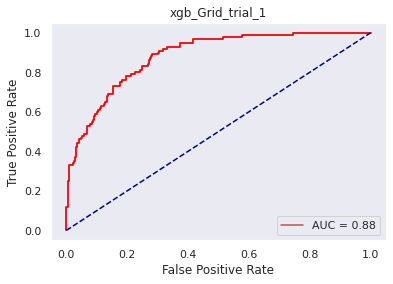

In [95]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(y_test_s, xgb_Grid_trial_1.predict_proba(X_test_s)[:,1])

roc_auc = roc_auc_score(y_test_s, xgb_Grid_trial_1.predict_proba(X_test_s)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('xgb_Grid_trial_1')
plt.legend(loc = 'lower right')
plt.grid()

on kaggle i get around 88% 

it's the best one

##Trail_2 (randomSearch, Decision Tree model)

* now i will train on Decision tree model on the same data but using randomSearch for hyperparameter tuning to see if there is any improve or not 

* but i expecte to have any improve i expect to get around 83% for roc_auc or more which it will better than the previous one

In [ ]:
DT_Random = Pipeline(
    steps=[
        ('preprocessor', preprocessor_s),
        ('DT_random', DecisionTreeClassifier(random_state=3)
        )
    ]
)
DT_Random

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', '

In [ ]:
DT_random_params = {
 'preprocessor__num__imputer__strategy': ['mean','median'],
 'DT_random__criterion' : ["gini" , "entropy"],
 'DT_random__max_depth' : [4, 5, 7, 10, 15, 20],
 'DT_random__min_samples_leaf' : [1, 2, 3, 4, 7, 10, 15, 20],
 }

# cv=2 means five-fold cross-validation
# n_jobs means the cucurrent number of jobs
#n_iter ==> # number of random trials
DT_Random_trail_2 = RandomizedSearchCV(DT_Random, DT_random_params, cv=2, n_iter=50, verbose=3, n_jobs=2, scoring='roc_auc')
DT_Random_trail_2.fit(X_train_s, y_train_s)

# to show the best score and hyperparameters

print('best score {}'.format(DT_Random_trail_2.best_score_))
print('best score {}'.format(DT_Random_trail_2.best_params_))
  

Fitting 2 folds for each of 50 candidates, totalling 100 fits
best score 0.8041376873487484
best score {'preprocessor__num__imputer__strategy': 'median', 'DT_random__min_samples_leaf': 1, 'DT_random__max_depth': 4, 'DT_random__criterion': 'entropy'}


this model is better than the previous DT model but it's less than what i expected and i will use another model to see if there is any improve or not
which this model give me 80.4% score and the previous DT model give me 79% Score

**virtualization for Roc_curve by using the model with the test**

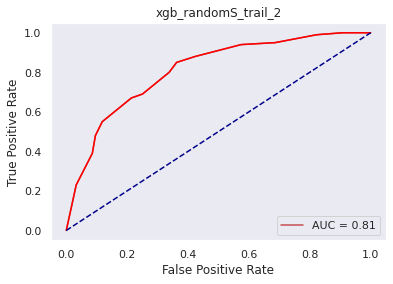

In [ ]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(y_test_s, DT_Random_trail_2.predict_proba(X_test_s)[:,1])

roc_auc = roc_auc_score(y_test_s, DT_Random_trail_2.predict_proba(X_test_s)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('xgb_randomS_trail_2')
plt.legend(loc = 'lower right')
plt.grid()

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/test.csv')
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = DT_Random_trail_2.predict_proba(dft_1)[:,1]

submission.to_csv('xgb_FT.csv', index=False)

on kaggle i got around 80%

this the worst one

##Trail_3 (BayesianSearch, RandomForest model)

* now i will train on RandomForest model on the same data but using BayesianSearch for hyperparameter tuning to see if there is any improve or not 

* but i expect to have any improve i expect to get around 88% for roc_auc or more

In [96]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
RF_Bayes = Pipeline(
    steps=[
        ('preprocessor', preprocessor_s),
        ('RF_Bayes_s', RandomForestClassifier(random_state = 3),
        )
    ])
RF_Bayes

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'condtn', 'wave',
                                                   'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'samerace',
                                                   'age_o', 'race_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', '

In [97]:
# using a wider range of parameters
RF_Bayes_params = {
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'preprocessor__num__imputer__strategy': ['mean','median'],
    # wider range for number of estimators in the ensemble
    'RF_Bayes_s__n_estimators': [100,150,200,250],
    # maximum tree depth
    'RF_Bayes_s__max_depth':[10,20,30,50],
}
# cv=2 means five-fold cross-validation
# n_jobs means the cucurrent number of jobs
#n_iter ==> # number of random trials
RF_Bayes_S_Trail_3 = BayesSearchCV(RF_Bayes, RF_Bayes_params, cv=2, n_iter=20, verbose=1, n_jobs=2, scoring='roc_auc')
RF_Bayes_S_Trail_3.fit(X_train_s, y_train_s)

# to show the best score and hyperparameters

print('best score {}'.format(RF_Bayes_S_Trail_3.best_score_))
print('best score {}'.format(RF_Bayes_S_Trail_3.best_params_))
  

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
best score 0.8434389807414638
best score OrderedDict([('RF_Bayes_s__max_depth', 10), ('RF_Bayes_s__n_estimators', 250), ('preprocessor__num__imputer__strategy', 'mean')])


as we see the result is 84% which is different than what i was expecting but the result is good not bad

**virtualization for Roc_curve by using the model with the test**

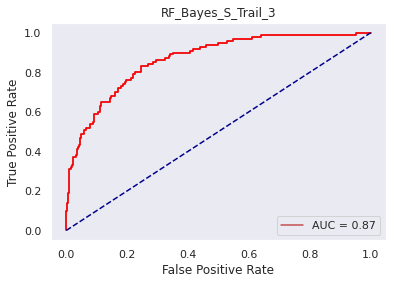

In [98]:
#Calculating Area Under the Curve with predict probapility:
fpr, tpr, thresholds = roc_curve(y_test_s, RF_Bayes_S_Trail_3.predict_proba(X_test_s)[:,1])

roc_auc = roc_auc_score(y_test_s, RF_Bayes_S_Trail_3.predict_proba(X_test_s)[:,1])
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr, tpr, color='red', label='')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF_Bayes_S_Trail_3')
plt.legend(loc = 'lower right')
plt.grid()

In [99]:
df2 = pd.read_csv('/content/drive/MyDrive/DEBI/Queens/DM/Assignment_2/test.csv')
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = RF_Bayes_S_Trail_3.predict_proba(dft_1)[:,1]

submission.to_csv('xgb_FT.csv', index=False)

on kaggle i got around 87%

this trial is so-so not good not bad

####Conclusion

So from all trials i did until now the Trial_1 in the second trial for data preprocessing is the best one which is XGB model with GrideSearch give me 86.6% score it's incress the score than the previous on with 0.6% which not very good

# Problem Formulation

###**Define the problem**

>This is a binary classification task

>Given a information about the dating session then we need to predict the probability that the dating session will lead to a successful match or not.

>Whether a first date will lead to a relationship

>a recommendation system to better match people in speed dating events


###**What is the input?**

> the input are given information about the dating session
> The input data are profile of each participant in the session and survey about the participants.

> the input are 191 features and this features need to handling so may be reduced to 184 features , 124 features or less than these


###**What is the output?**

> binary classification.

> probability that the dating session will lead to a successful match or not.



###**What data mining function is required?**

>the data mining function i used are

* import libraries
> which used in the models and to help me to deal with many things
* load the data
> to deal with the model to make a prediction
* virtualize the data and some columns
> to help me to find any information or pattern

* Data preprocessing 
> clean the data\
> drop columns which has more than 50% null value\
> fill the null values\
> drop columns that not important in the training models\
> handle the columns which has Inconsistent Data Entry\
> convert the object data to categorical data\
> using normalization\
> using different types of data preprocessing \
> Removing columns with unique value, like [ id , idg , pid , partner ] Its content was recognized by 'Speed Dating Data Description.pdf'\
> drop some features and use another feature represent the same information [age, career, field] \

* hyperparameters tunning
> use many methods for find the optimal hyperparameters 
  * GrideSearch
  * RandomeSearch
  * BayesianSearch

* use many models 
  * Decision Tree Model
  * XGBClassifier Model
  * RandomForestClassifier Model




###**What could be the challenges?**

>the callenges was how to find the problems in the data and how to deal with this problems like

* how to deal with unique values
* how to deal with Inconsistent Data Entry
* how to deal with the not important features
* how to deal with categorical data
* how to deal with object data
* how to deal with numerical data
* how to normalize the data
* how to fill the nan values
* how to deal with nan values

> for the models was there many challenges like

* how to chose the optimal hyperparameters
* how to improve the performance of the models
* how to find the best roc_auc

> for the tuning
* how to select the different values for the different hyperparameters each model
*  the huge time which take GrideSearch and RandomSearch and BayesianSearch for founding the optimal hyperparameters which was take maybe around 2 hours

###**What is the impact?**

> Understanding the features that contribute to successful matches would be the impact of this perfect solution, Furthermore, this would provide an opportunity to make useful recommendations for future speed dating events.

>and it will help people to find the best one for them to go in relationship with each other



###**What is an ideal solution?**

> An ideal solution will effectively address these problems by creating a dataset-representative missing value replacement technique and optimising hyperparameters to make the most correct estimates possible, and need a lot of data and need for cleaning data to give us a perfect prediction

#### And the best solution i did was by using the XGBClassifier in the second trial for data preprocessing which give me
* 86.6% score for training
* 88% score for test set
* 88% on kaggle


#Questions

###Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

> The First Problem is The Linear Regression deals with continuous values but the classification problems deals with discrete values.

> The second problem is regarding the shift in threshold value when new data points are added.
  *  Let us take a simple Linear Regression example and fit a line to it. then we got the best fit line for this example. but when we add another point to this dataset, our best fit line shifts to fit that point.
  * if we have to classify whether a person is sick or not, this method is not reliable at all since we use a sigmoid function in logistic regression. If there is a shift in the line then the minimum threshold value for classifying the examples changes. So in the beginning, the threshold might be 0.5 but after adding few more data points the value might be 0.8. So the accuracy of the model takes a hit here. Also deploying a model with such instability in a field such as healthcare is not so good and can have dire consequences.
  * Hence to avoid this we use an algorithm called the Logistic Regression which is a binary classification algorithm to stepover these practical problems that hold back Linear Regression for classification.
  * Technically the hypothesis function for linear regression can be used for logistic regression also but there is a problem.
  * Logistic Regression deals with discrete values unlike Linear Regression and also maintains the value of the threshold even when new data points are added.



[Source](https://medium.com/analytics-vidhya/why-linear-regression-is-not-suitable-for-classification-cd724dd61cb8)



###What's a decision tree and how it is different to a logistic regression model?

>A decision tree is a map of the possible outcomes of a series of related choices. It allows an individual or organization to weigh possible actions against one another based on their costs, probabilities, and benefits. They can can be used either to drive informal discussion or to map out an algorithm that predicts the best choice mathematically. it typically starts with a single node, which branches into possible outcomes. Each of those outcomes leads to additional nodes, which branch off into other possibilities. This gives it a treelike shape. it has three different types of nodes: chance nodes, decision nodes, and end nodes. A chance node, represented by a circle, shows the probabilities of certain results. A decision node, represented by a square, shows a decision to be made, and an end node shows the final outcome of a decision path.

[Ref.](https://www.lucidchart.com/pages/decision-tree)

> * **Decision Tree:**  Divide the space into smaller and smaller segments.
* **Logistic Regression:** fits a single line perfectly dividing the space into two spaces.

>Logistic Regression and trees differ in the way that they generate decision boundaries i.e. the lines that are drawn to separate different classes. To illustrate this difference, let’s look at the results of the two model types on the following 2-class problem:

> 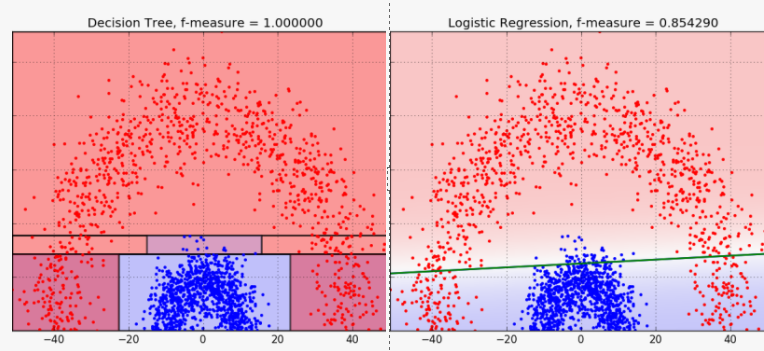

> Decision Trees divide the space into smaller and smaller sections, while Logistic Regression fits a single line to precisely divide the space into two. These lines would, of course, generalise to planes and hyperplanes for higher-dimensional data. For Logistic Regression, a single linear boundary can be restricting at times.

[Ref.](https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/)
[Ref.](https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20essentially%20uses%20a,bounded%20between%200%20and%201.)

###What's the difference between grid search and random search?

>**Grid Search:**
  * This is the most basic approach of hyperparameter adjustment. A grid of hyperparameter values is defined. The tuning process iteratively searches this space for every possible combination of hyperparameter values, training a model for each one.

>**Random Search:**
  *  We don't supply an explicit list of possible values for each hyperparameter in random search; instead, we present a statistical distribution for each hyperparameter from which values are sampled. To do a randomised search, we define a sampling distribution for each hyperparameter.

> the difference is:
  * Because the number of models to train rises exponentially with the number of hyperparameters to train, grid search is rarely employed in practise. This is inefficient in terms of both processing power and time.
  * We may also regulate or limit the amount of hyperparameter combinations used by using random search. Unlike grid search, which evaluates every conceivable combination, random search allows us to define a predetermined number of models to train and then stop the tuning method. You can also specify the number of search iterations based on time or resources.

> 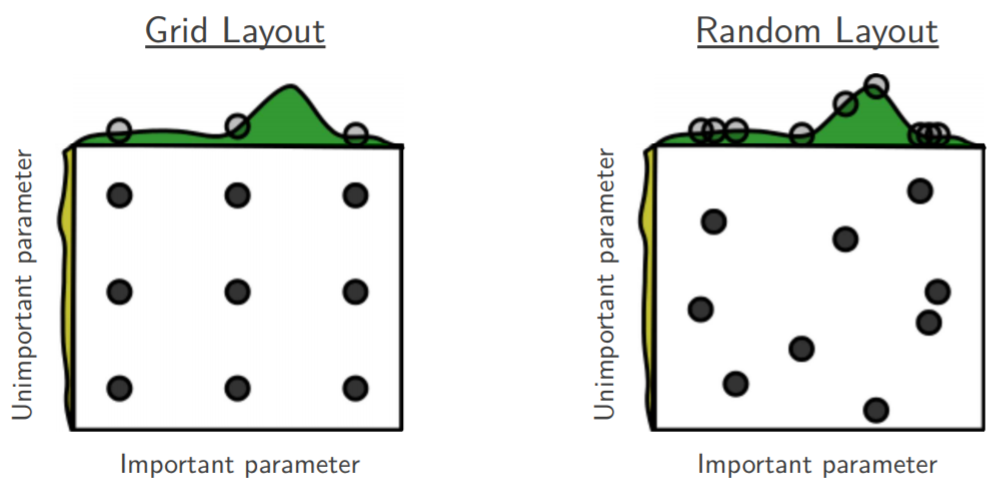

* [Ref.](https://medium.com/analytics-vidhya/comparison-of-hyperparameter-tuning-algorithms-grid-search-random-search-bayesian-optimization-5326aaef1bd1)
* [Ref.](https://medium.com/@peterworcester_29377/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

###What's the difference between bayesian search and random search?

> **Bayesian Optimization:**
  * Bayesian optimization is a sequential model-based optimization (SMBO) algorithm that uses the results from the previous iteration to decide the next hyperparameter value candidates.
  * Bayesian optimization creates a probabilistic model, mapping hyperparameters to a probability of a score on the objective function.

> **The differemce:**
  * Rather of scanning the hyperparameter space blindly (as in grid search and random search), this method recommends using intelligence to select the next set of hyperparameters that will increase model performance. This method is repeated iteratively until we reach an optimal result.
  * Because they select hyperparameters in an informed manner, Bayesian optimization methods are efficient. Bayesian approaches can locate the best hyperparameters in less time (fewer iterations) than grid search and random search because they emphasize hyperparameters that appear more promising from previous findings.

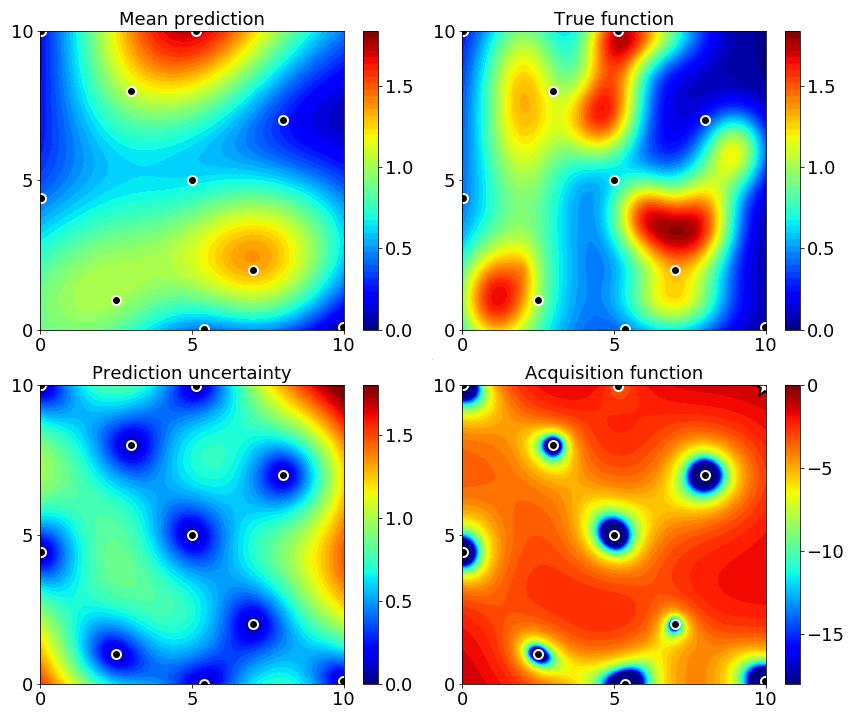

* [Ref.](https://medium.com/@peterworcester_29377/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

* [Ref.](https://medium.com/analytics-vidhya/comparison-of-hyperparameter-tuning-algorithms-grid-search-random-search-bayesian-optimization-5326aaef1bd1)

#Sources



[Source](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

[Source](https://www.kaggle.com/abhowmick22/speed-dating-analysis)

[Source](https://www.kaggle.com/aeshen/the-secret-to-getting-the-second-date)

[Source](https://www.kaggle.com/lucabasa/the-data-science-book-of-love)

[Source](https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/)

[Source](https://xgboost.readthedocs.io/en/stable/parameter.html)

[Source](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

[Source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[Source](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[Source](https://towardsdatascience.com/gridsearchcv-or-randomsearchcv-5aa4acf5348c)

[Source](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[Source](https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399)